<a href="https://colab.research.google.com/github/GARF1094/FDA/blob/main/Trabajo_Final_FDA_230520_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

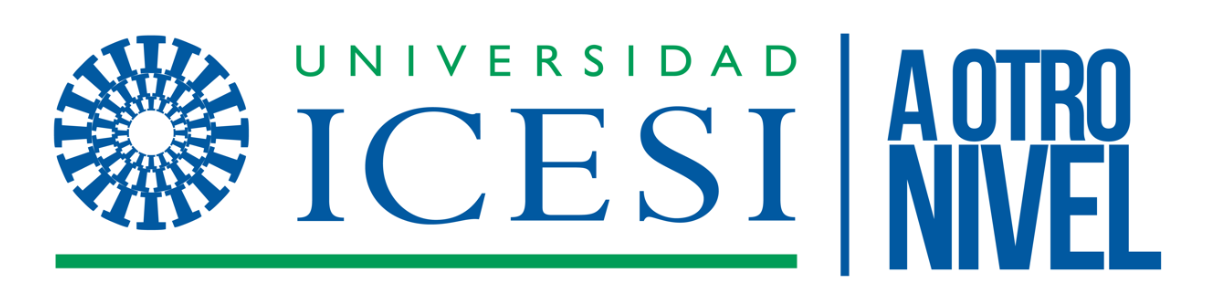

**Fundamentos de Analítica I**

**Trabajo Final** 

**Presentado Por:**

*   Diana Guzmán Granobles
*   Sebastian Barrera Peña
*   Gustavo Restrepo Figueroa

**Maestría en Ciencia de Datos 2023-1**

## **Cargue de Librerías y complementos**

In [1275]:
!pip install scikit-learn
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 111.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 627.2 kB/s eta 0:00:00
 

In [1276]:
import pandas as pd  # Librería para manipular y analizar datos
import matplotlib.pyplot as plt  # Librería para visualizar
import seaborn as sns  # Librería para visualizar
import numpy as np  # Librería para operaciones numéricas
import plotly  # Librería para visualizaciones interactivas
import matplotlib.ticker as mtick  # Función para formatear en visualizaciones
from scipy.stats import norm  # Distribución normal
from scipy.stats import poisson  # Distribución Poisson
from scipy.stats import t  # Distribución t
from scipy.stats import f  # Distribución F
from scipy.stats import ttest_1samp  # Prueba t una población
from scipy.stats import ttest_ind  # Prueba t comparación medias
from scipy.stats import shapiro  # Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson  # Prueba normalidad Anderson-Darling
from scipy.stats import levene  # Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu  # Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway  # Prueba ANOVA de una vía
from scipy.stats import chi2_contingency  # Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr  # Coeficiente de correlación de Pearson con prueba
from sklearn.preprocessing import StandardScaler  # Escalador estándar
from sklearn.linear_model import LinearRegression  # Regresión lineal
import statsmodels.stats as sm  # Estadísticas
import statsmodels.api as sm1  # Estadísticas
from statsmodels.graphics.gofplots import qqplot  # Gráfico QQ plot
from sklearn.preprocessing import OneHotEncoder  # Codificación one-hot
from scipy.stats import skew, kurtosis  # Funciones estadísticas
from sklearn import tree, datasets, neighbors, metrics  # Árbol de decisión, conjuntos de datos, vecinos cercanos, métricas
from sklearn.model_selection import train_test_split  # Método de particionamiento de conjuntos de datos para evaluación
from sklearn.model_selection import cross_val_score, cross_validate  # Método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut  # Iteradores de C-V
import math  # Funciones matemáticas
from collections import Counter  # Contador de elementos
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabasz_score  # Métricas de evaluación
from sklearn.decomposition import PCA  # Análisis de componentes principales
from sklearn.cluster import KMeans  # Algoritmo de agrupamiento K-Means
import xgboost as xgb  # Importar XGBoost
from xgboost import XGBClassifier  # Importar XGBClassifier
from xgboost import cv  # Importar función cv de XGBoost
from sklearn.ensemble import BaggingClassifier  # Clasificador por ensamblaje Bagging
from sklearn.tree import DecisionTreeClassifier  # Clasificador de árbol de decisión
from sklearn.datasets import make_classification  # Creación de conjuntos de datos para clasificación
from sklearn.metrics import accuracy_score  # Métrica de precisión
from sklearn.model_selection import cross_val_predict  # Predicción con validación cruzada
from dataprep.eda import create_report

import warnings
warnings.filterwarnings('ignore')

# **Descripción**

El conjunto de datos (imports-85.data) a analizar consta de tres tipos de entidades: (a) la especificación de un automóvil en términos de varias características, (b) su calificación de riesgo de seguro asignada, y (c) sus pérdidas de uso normalizadas en comparación con otros automóviles. La calificación corresponde al grado en que el auto es más riesgoso de lo que indica su precio. A los automóviles se les asigna inicialmente un símbolo de factor de riesgo asociado con su precio. Luego, si es de mayor riesgo (o menos), se ajusta este símbolo moviéndolo hacia la derecha (o hacia la izquierda) en la escala. Los actuarios llaman a este proceso "simbolización". Un valor de +3 indica que el auto es riesgoso, mientras -3 significa que probablemente sea bastante seguro. El tercer factor es el pago de pérdida promedio relativo por año de vehículo asegurado. Este valor está normalizado para todos los autos dentro de una clasificación de tamaño particular (pequeño de dos puertas, familiar, deportivo/especial, etc.), y representa la pérdida promedio por auto por año.

Enlaces de Referencia (Borrar)

https://www.kaggle.com/datasets/fazilbtopal/auto85

https://www.kaggle.com/code/fazilbtopal/model-development-and-evaluation-with-python

https://www.kaggle.com/code/fazilbtopal/exploratory-data-analysis-with-python

https://www.kaggle.com/datasets/toramky/automobile-dataset?datasetId=1291

https://www.kaggle.com/code/ashitarai05/starter-1985-automobile-dataset-e06af006-b



https://www.kaggle.com/code/ryanholbrook/mutual-information/tutorial


# **Información de los atributos:**

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continua de 65 a 256. 
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continua de 86.6 a 120.9. 
11. length: continua de 141.1 a 208.1. 
12. width: continua de 60.3 a 72.3. 
13. height: continua de 47.8 a 59.8. 
14. curb-weight: continua de 1488 a 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continua de 61 a 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continua de 2.54 a 3.94. 
20. stroke: continua de 2.07 a 4.17. 
21. compression-ratio: continua de 7 a 23. 
22. horsepower: continua de 48 a 288. 
23. peak-rpm: continua de 4150 a 6600. 
24. city-mpg: continua de 13 a 49.
25. highway-mpg: continua de 16 a 54.
26. price: continua de 5118 a 45400.




# **Objetivo de negocio**


El objetivo de este proyecto es predecir la calificación de riesgo de seguro de un automóvil, así como caracterizar los diferentes tipos de clientes.

# **Metodología**

## **1. Limpieza y EDA**

Compruebe si hay problemas de calidad de datos.
Debe evaluar la calidad de los datos, así como comprender la relación entre las características y la variable de destino.

In [1277]:
# Carga de Datos
URL = "https://raw.githubusercontent.com/GARF1094/FDA/main/imports-85.data" 
df=pd.read_csv(URL)

In [1278]:
df.head(3)

3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.60  ...  \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front   88.6  ...   
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front   94.5  ...   
2  2  164         audi  gas  std  four        sedan  fwd  front   99.8  ...   

   130  mpfi  3.47  2.68  9.00  111  5000  21  27  13495  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
1  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
2  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  

[3 rows x 26 columns]

In [1279]:
column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
                'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height',
                'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore',
                'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

df.columns = column_names

In [1280]:
df.head(3)

symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1    hatchback          rwd           front        94.5  ...          152   
2        sedan          fwd           front        99.8  ...          109   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  2.68    3.47               9.0        154      5000       19   
2         mpfi  3.19    3.40              10.0        102      5500       24   

  highway_mpg  price  
0          27  16500  
1          26  16500  
2          30  13950  

[3 rows x 26 columns]

### **1.1. Exploración de Dataset**

Explorar la forma general del dataset utilizando funciones como *shape*, *head*, *tail*, *dtypes* e *isnull* es importante por varias razones:

**Dimensiones del dataset (shape):** La función shape proporciona el número de filas y columnas del dataset. Conocer las dimensiones del dataset es fundamental para comprender el tamaño del conjunto de datos con el que se está trabajando y estimar la cantidad de información disponible.

**Visualización de los primeros y últimos registros (head y tail):** Las funciones head y tail permiten ver una muestra de los primeros y últimos registros del dataset, respectivamente. Esto es útil para obtener una idea de la estructura y el contenido de los datos, así como para verificar si los datos se cargaron correctamente y cumplen con las expectativas iniciales.

**Tipos de datos de las columnas (dtypes):** La función dtypes muestra los tipos de datos de cada columna en el dataset. Conocer los tipos de datos es importante para comprender cómo se almacenan los datos y qué operaciones se pueden realizar con ellos. Además, ayuda a identificar posibles errores de tipo, como una columna que debería ser numérica pero se carga como texto.

**Valores faltantes (isnull):** La función isnull permite identificar los valores faltantes en el dataset. Los valores faltantes pueden afectar el análisis y los resultados, por lo que es esencial detectarlos y decidir cómo manejarlos. Conocer la cantidad y la ubicación de los valores faltantes ayuda a determinar si es necesario aplicar técnicas de imputación o eliminar ciertas filas o columnas del dataset.

Explorar la forma general del dataset utilizando estas funciones proporciona información clave sobre la estructura, contenido, tipos de datos y presencia de valores faltantes. Esta exploración inicial es esencial para comprender los datos, tomar decisiones sobre el preprocesamiento y la limpieza de los mismos, y comenzar a realizar análisis y visualizaciones más avanzadas.

In [1281]:
# Revisión de la forma de la matriz en términos de filas y columnas.
df.shape

(204, 26)

In [1282]:
# Revisión de los datos de la matriz.
df.head(5)

symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1    hatchback          rwd           front        94.5  ...          152   
2        sedan          fwd           front        99.8  ...          109   
3        sedan          4wd           front        99.4  ...          136   
4        sedan          fwd           front        99.8  ...          136   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  2.68    3.47               9.0        154      5000       19   
2         mpfi  3.19    3.40              10.0        102      5500       24   
3         mpfi  3.19    3.40               8.0        115      5500       18   
4         mpfi  3.19    3.40               8.5        110      5500       19   

  highway_mpg  price  
0          27  16500  
1          26  16500  
2          30  13950  
3          22  17450  
4          25  15250  

[5 rows x 26 columns]

In [1283]:
# Revisión de los últimos datos de la matriz.
df.tail(5)

symboling normalized_losses   make fuel_type aspiration num_of_doors  \
199         -1                95  volvo       gas        std         four   
200         -1                95  volvo       gas      turbo         four   
201         -1                95  volvo       gas        std         four   
202         -1                95  volvo    diesel      turbo         four   
203         -1                95  volvo       gas      turbo         four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
199      sedan          rwd           front       109.1  ...          141   
200      sedan          rwd           front       109.1  ...          141   
201      sedan          rwd           front       109.1  ...          173   
202      sedan          rwd           front       109.1  ...          145   
203      sedan          rwd           front       109.1  ...          141   

     fuel_system  bore  stroke compression_ratio horsepower  peak_rpm  \
199         mpfi  3.78    3.15               9.5        114      5400   
200         mpfi  3.78    3.15               8.7        160      5300   
201         mpfi  3.58    2.87               8.8        134      5500   
202          idi  3.01    3.40              23.0        106      4800   
203         mpfi  3.78    3.15               9.5        114      5400   

    city_mpg highway_mpg  price  
199       23          28  16845  
200       19          25  19045  
201       18          23  21485  
202       26          27  22470  
203       19          25  22625  

[5 rows x 26 columns]

In [1284]:
#Verificando el tipo de datos de cada una de las variables de la matriz:
df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [1285]:
# Revisión del porcentaje de datos nulos en cada una de las variables
df.isnull().sum()/len(df)*100

symboling            0.0
normalized_losses    0.0
make                 0.0
fuel_type            0.0
aspiration           0.0
num_of_doors         0.0
body_style           0.0
drive_wheels         0.0
engine_location      0.0
wheel_base           0.0
length               0.0
width                0.0
height               0.0
curb_weight          0.0
engine_type          0.0
num_of_cylinders     0.0
engine_size          0.0
fuel_system          0.0
bore                 0.0
stroke               0.0
compression_ratio    0.0
horsepower           0.0
peak_rpm             0.0
city_mpg             0.0
highway_mpg          0.0
price                0.0
dtype: float64

**Análisis parcial:**

La primera impresión es que aparentemente no se tienen datos nulos y que algunas columnas no tienen el tipo de dato que deberian. Sin embargo, a simple vista, gracias al análisis previo, se evidencia que se tienen valores faltantes y estos se identifican en las columnas con un signo "?", por lo tanto, se procederá a reemplazarlos por un "NaN" en primera instancia, posteriormente se dará tratamiento a este tipo de valores.

In [1286]:
# Reemplazar "?" por NaN en todas las columnas
df.replace("?", np.nan, inplace=True)

In [1287]:
# Revisión de los primeros datos de la matriz.
df.head(3)

symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          1               NaN  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1    hatchback          rwd           front        94.5  ...          152   
2        sedan          fwd           front        99.8  ...          109   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  2.68    3.47               9.0        154      5000       19   
2         mpfi  3.19    3.40              10.0        102      5500       24   

  highway_mpg  price  
0          27  16500  
1          26  16500  
2          30  13950  

[3 rows x 26 columns]

Ahora sí se visualiza el porcentaje real de datos faltantes en la base dde datos:

In [1288]:
# Revisión del porcentaje de datos nulos en cada una de las variables
df.isnull().sum()/len(df)*100

symboling             0.000000
normalized_losses    19.607843
make                  0.000000
fuel_type             0.000000
aspiration            0.000000
num_of_doors          0.980392
body_style            0.000000
drive_wheels          0.000000
engine_location       0.000000
wheel_base            0.000000
length                0.000000
width                 0.000000
height                0.000000
curb_weight           0.000000
engine_type           0.000000
num_of_cylinders      0.000000
engine_size           0.000000
fuel_system           0.000000
bore                  1.960784
stroke                1.960784
compression_ratio     0.000000
horsepower            0.980392
peak_rpm              0.980392
city_mpg              0.000000
highway_mpg           0.000000
price                 1.960784
dtype: float64

In [1289]:
#ahora que ya tenemos identificados los nulos ajustamos el tipo de datos de algunas de las variables de la matriz
df['symboling'] = df['symboling'].astype(int)
df['normalized_losses'] = df['normalized_losses'].astype(float)
df['wheel_base'] = df['wheel_base'].astype(float)
df['length'] = df['length'].astype(float)
df['width'] = df['width'].astype(float)
df['height'] = df['height'].astype(float)
df['curb_weight'] = df['curb_weight'].astype(float)
df['engine_size'] = df['engine_size'].astype(float)
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['compression_ratio'] = df['compression_ratio'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['peak_rpm'] = df['peak_rpm'].astype(float)
df['city_mpg'] = df['city_mpg'].astype(float)
df['highway_mpg'] = df['highway_mpg'].astype(float)
df['price'] = df['price'].astype(float)

In [1290]:
#Verificando los cambios en el tipo de datos de las variables de la matriz:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
engine_type           object
num_of_cylinders      object
engine_size          float64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object

### **1.2. Manejo de datos faltantes:**

Se ha decidido no eliminar datos faltantes y en su lugar, reemplazarlos con valores estadísticos como la mediana (para datos numéricos) y la moda (para datos categóricos), de acuerdo con las siguientes justificaciones:

**Conservación de información:** Eliminar filas o columnas con datos faltantes puede resultar en la pérdida de información importante. En este caso, dado que los registros de la base son pocos (alrededor de 200) y las variables son mcuhas, es preferible retener la mayor cantidad posible de datos y reemplazar los valores faltantes.

**Mantenimiento de la distribución original:** Reemplazar los valores faltantes por la mediana (en el caso de datos numéricos) y la moda (en el caso de datos categóricos) permite preservar la distribución original de los datos. Estas medidas estadísticas son resistentes a los valores atípicos y representan valores centrales que reflejan mejor el conjunto de datos sin verse afectados por valores extremos.

**Estabilidad del análisis:** Al reemplazar los valores faltantes por la mediana o la moda, se asegura la estabilidad del análisis y los resultados. Esto significa que si se realizan múltiples ejecuciones del análisis o se agregan nuevos datos con valores faltantes, los resultados no se verán afectados drásticamente, ya que la mediana y la moda son valores estables y consistentes.

**Aplicación en diferentes contextos:** La mediana y la moda son medidas estadísticas ampliamente utilizadas y comprensibles en diversos contextos. Su uso para reemplazar los valores faltantes es relativamente sencillo de implementar y se entiende fácilmente en comparación con técnicas más avanzadas de imputación.

In [1291]:
# Reemplazar NaN por la mediana para atributos numericos, dado que es la medida de tendencia central que menos se ve afectada por atípicos 
# Reemplazar NaN por la moda para atributos categóricos.

df["normalized_losses"].replace(np.nan, df["normalized_losses"].median(), inplace = True)
df["bore"].replace(np.nan, df["bore"].median(), inplace = True)
df["stroke"].replace(np.nan, df["stroke"].median(), inplace = True)
df["horsepower"].replace(np.nan, df["horsepower"].median(), inplace = True)
df["peak_rpm"].replace(np.nan, df["peak_rpm"].median(), inplace = True)
df["price"].replace(np.nan, df["price"].median(), inplace = True)
df["num_of_doors"].replace(np.nan, df["num_of_doors"].mode()[0], inplace = True)

In [1292]:
# Revisión del porcentaje de datos nulos en cada una de las variables
df.isnull().sum()/len(df)*100

symboling            0.0
normalized_losses    0.0
make                 0.0
fuel_type            0.0
aspiration           0.0
num_of_doors         0.0
body_style           0.0
drive_wheels         0.0
engine_location      0.0
wheel_base           0.0
length               0.0
width                0.0
height               0.0
curb_weight          0.0
engine_type          0.0
num_of_cylinders     0.0
engine_size          0.0
fuel_system          0.0
bore                 0.0
stroke               0.0
compression_ratio    0.0
horsepower           0.0
peak_rpm             0.0
city_mpg             0.0
highway_mpg          0.0
price                0.0
dtype: float64

### **1.3. Valores unicos**

In [1293]:
#Revisando número de valores únicos por variable
df.nunique()

symboling              6
normalized_losses     51
make                  22
fuel_type              2
aspiration             2
num_of_doors           2
body_style             5
drive_wheels           3
engine_location        2
wheel_base            53
length                75
width                 44
height                49
curb_weight          171
engine_type            7
num_of_cylinders       7
engine_size           44
fuel_system            8
bore                  38
stroke                36
compression_ratio     32
horsepower            59
peak_rpm              23
city_mpg              29
highway_mpg           30
price                186
dtype: int64

In [1294]:
# Obtener el listado de valores únicos por cada columna 
unique_values = {}
for column in df.columns:
    if df[column].dtype in [int, float]:
        unique_values[column] = sorted(df[column].unique())
    else:
        unique_values[column] = df[column].unique()

# Mostrar el listado de valores únicos por cada columna
for column, values in unique_values.items():
    print(f"Valores únicos en la columna {column}:")
    if df[column].dtype in [int, float]:
        if len(values) <= 20:
            print(values)
        else:
            for i in range(0, len(values), 20):
                print(values[i:i+20])
    else:
        print(values)
    print()


Valores únicos en la columna symboling:
[-2, -1, 0, 1, 2, 3]

Valores únicos en la columna normalized_losses:
[65.0, 74.0, 77.0, 78.0, 81.0, 83.0, 85.0, 87.0, 89.0, 90.0, 91.0, 93.0, 94.0, 95.0, 98.0, 101.0, 102.0, 103.0, 104.0, 106.0]
[107.0, 108.0, 110.0, 113.0, 115.0, 118.0, 119.0, 121.0, 122.0, 125.0, 128.0, 129.0, 134.0, 137.0, 142.0, 145.0, 148.0, 150.0, 153.0, 154.0]
[158.0, 161.0, 164.0, 168.0, 186.0, 188.0, 192.0, 194.0, 197.0, 231.0, 256.0]

Valores únicos en la columna make:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Valores únicos en la columna fuel_type:
['gas' 'diesel']

Valores únicos en la columna aspiration:
['std' 'turbo']

Valores únicos en la columna num_of_doors:
['two' 'four']

Valores únicos en la columna body_style:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Valores únicos en 

In [1295]:
#No entiendo esta funcion, incluso tiene malas las columnas, no tiene sentido.

valores_unicos = df.apply(pd.Series.value_counts)
valores_unicos

symboling  normalized_losses  make  fuel_type  aspiration  \
-2.0              3.0                NaN   NaN        NaN         NaN   
-1.0             22.0                NaN   NaN        NaN         NaN   
0.0              67.0                NaN   NaN        NaN         NaN   
1.0              54.0                NaN   NaN        NaN         NaN   
2.0              32.0                NaN   NaN        NaN         NaN   
...               ...                ...   ...        ...         ...   
twelve            NaN                NaN   NaN        NaN         NaN   
two               NaN                NaN   NaN        NaN         NaN   
volkswagen        NaN                NaN  12.0        NaN         NaN   
volvo             NaN                NaN  11.0        NaN         NaN   
wagon             NaN                NaN   NaN        NaN         NaN   

            num_of_doors  body_style  drive_wheels  engine_location  \
-2.0                 NaN         NaN           NaN              NaN   
-1.0                 NaN         NaN           NaN              NaN   
0.0                  NaN         NaN           NaN              NaN   
1.0                  NaN         NaN           NaN              NaN   
2.0                  NaN         NaN           NaN              NaN   
...                  ...         ...           ...              ...   
twelve               NaN         NaN           NaN              NaN   
two                 88.0         NaN           NaN              NaN   
volkswagen           NaN         NaN           NaN              NaN   
volvo                NaN         NaN           NaN              NaN   
wagon                NaN        25.0           NaN              NaN   

            wheel_base  ...  engine_size  fuel_system  bore  stroke  \
-2.0               NaN  ...          NaN          NaN   NaN     NaN   
-1.0               NaN  ...          NaN          NaN   NaN     NaN   
0.0                NaN  ...          NaN          NaN   NaN     NaN   
1.0                NaN  ...          NaN          NaN   NaN     NaN   
2.0                NaN  ...          NaN          NaN   NaN     NaN   
...                ...  ...          ...          ...   ...     ...   
twelve             NaN  ...          NaN          NaN   NaN     NaN   
two                NaN  ...          NaN          NaN   NaN     NaN   
volkswagen         NaN  ...          NaN          NaN   NaN     NaN   
volvo              NaN  ...          NaN          NaN   NaN     NaN   
wagon              NaN  ...          NaN          NaN   NaN     NaN   

            compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  \
-2.0                      NaN         NaN       NaN       NaN          NaN   
-1.0                      NaN         NaN       NaN       NaN          NaN   
0.0                       NaN         NaN       NaN       NaN          NaN   
1.0                       NaN         NaN       NaN       NaN          NaN   
2.0                       NaN         NaN       NaN       NaN          NaN   
...                       ...         ...       ...       ...          ...   
twelve                    NaN         NaN       NaN       NaN          NaN   
two                       NaN         NaN       NaN       NaN          NaN   
volkswagen                NaN         NaN       NaN       NaN          NaN   
volvo                     NaN         NaN       NaN       NaN          NaN   
wagon                     NaN         NaN       NaN       NaN          NaN   

            price  
-2.0          NaN  
-1.0          NaN  
0.0           NaN  
1.0           NaN  
2.0           NaN  
...           ...  
twelve        NaN  
two           NaN  
volkswagen    NaN  
volvo         NaN  
wagon         NaN  

[890 rows x 26 columns]

In [1296]:
# Revisión de las métricas estadísticas descriptivas de las variables numéricas
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [1297]:
#Aqui deje el codigo ajustar las columnas
fun_tabla_descriptivas(df[['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 
                           'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']])

normalized_losses  wheel_base      length       width  \
count                   204.000000  204.000000  204.000000  204.000000   
mean                    120.627451   98.806373  174.075000   65.916667   
std                      31.880912    5.994144   12.362123    2.146716   
min                      65.000000   86.600000  141.100000   60.300000   
25%                     101.000000   94.500000  166.300000   64.075000   
50%                     115.000000   97.000000  173.200000   65.500000   
75%                     137.000000  102.400000  183.200000   66.900000   
max                     256.000000  120.900000  208.100000   72.300000   
coef. variation           0.264292    0.060666    0.071016    0.032567   
skew                      0.964249    1.061261    0.148757    0.890436   
kurtosis                  1.410321    0.980278   -0.120403    0.647039   

                     height  curb_weight  engine_size        bore      stroke  \
count            204.000000   204.000000   204.000000  204.000000  204.000000   
mean              53.749020  2555.602941   126.892157    3.328676    3.258922   
std                2.424901   521.960820    41.744569    0.271344    0.311781   
min               47.800000  1488.000000    61.000000    2.540000    2.070000   
25%               52.000000  2145.000000    97.000000    3.150000    3.110000   
50%               54.100000  2414.000000   119.500000    3.310000    3.290000   
75%               55.500000  2939.250000   142.000000    3.582500    3.410000   
max               59.800000  4066.000000   326.000000    3.940000    4.170000   
coef. variation    0.045115     0.204242     0.328977    0.081517    0.095670   
skew               0.075859     0.674538     1.929822    0.031273   -0.702877   
kurtosis          -0.458233    -0.085416     5.111533   -0.800466    2.211566   

                 compression_ratio  horsepower     peak_rpm    city_mpg  \
count                   204.000000  204.000000   204.000000  204.000000   
mean                     10.148137  104.132353  5126.715686   25.240196   
std                       3.981000   39.624060   478.126988    6.551513   
min                       7.000000   48.000000  4150.000000   13.000000   
25%                       8.575000   70.000000  4800.000000   19.000000   
50%                       9.000000   95.000000  5200.000000   24.000000   
75%                       9.400000  116.000000  5500.000000   30.000000   
max                      23.000000  288.000000  6600.000000   49.000000   
coef. variation           0.392289    0.380516     0.093262    0.259567   
skew                      2.582858    1.392573     0.064544    0.651079   
kurtosis                  5.029700    2.570073     0.040491    0.523568   

                 highway_mpg         price  
count             204.000000    204.000000  
mean               30.769608  13148.127451  
std                 6.898337   7898.645692  
min                16.000000   5118.000000  
25%                25.000000   7784.750000  
50%                30.000000  10270.000000  
75%                34.500000  16500.000000  
max                54.000000  45400.000000  
coef. variation     0.224193      0.600743  
skew                0.528681      1.823725  
kurtosis            0.387484      3.235011

**Pilas que en la tabla descriptiva esta saliendo un NaN**

In [1298]:
#Análisis descriptivo de variables categóricas para ver cuáles son valores cualitativos más recurrentes:
df.describe(include = 'object').T

count unique     top freq
make               204     22  toyota   32
fuel_type          204      2     gas  184
aspiration         204      2     std  167
num_of_doors       204      2    four  116
body_style         204      5   sedan   96
drive_wheels       204      3     fwd  120
engine_location    204      2   front  201
engine_type        204      7     ohc  148
num_of_cylinders   204      7    four  158
fuel_system        204      8    mpfi   93

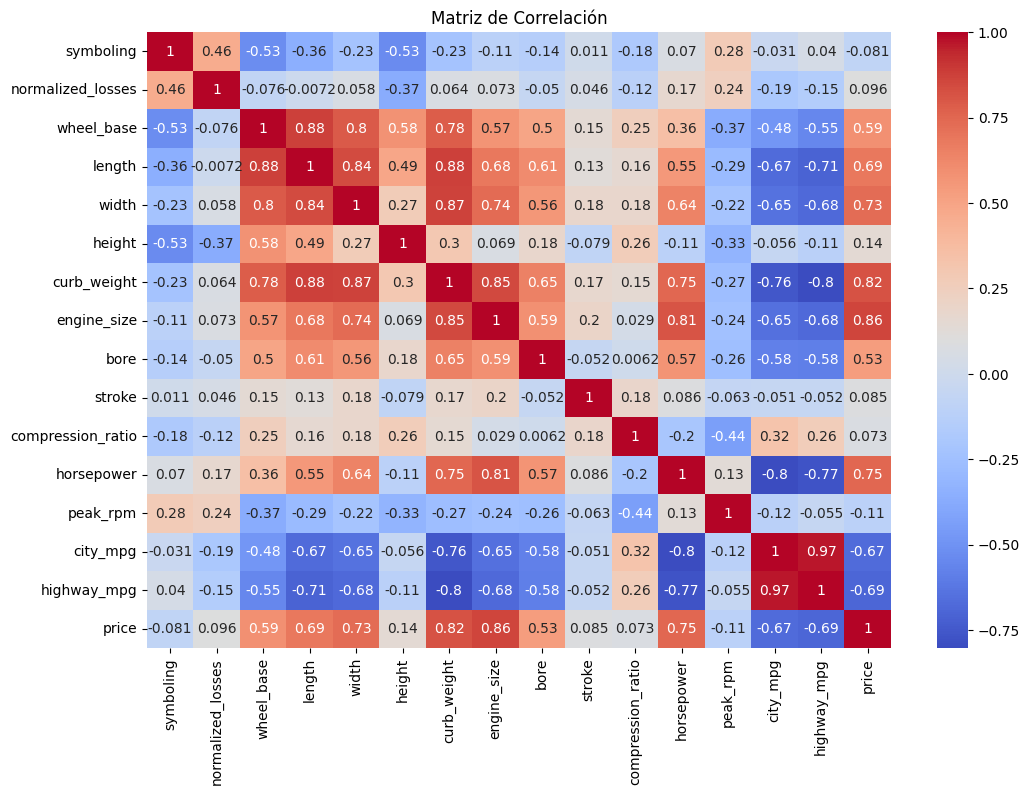

In [1299]:
# Obtener la matriz de correlación
matriz_correlacion = df.corr()

# Generar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

### **1.4. Análisis Univariado:**



DataPrep Report
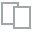
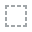
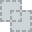
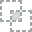
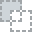
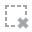
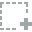
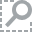
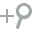
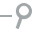
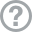
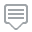
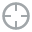
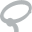
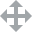
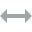
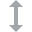
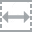
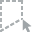
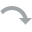
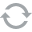
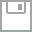
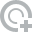
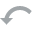
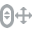
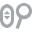
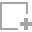
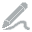
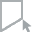
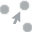
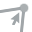
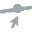

In [1388]:
create_report(df)

#### ***Variables Numéricas***

Incluir el DataPrep

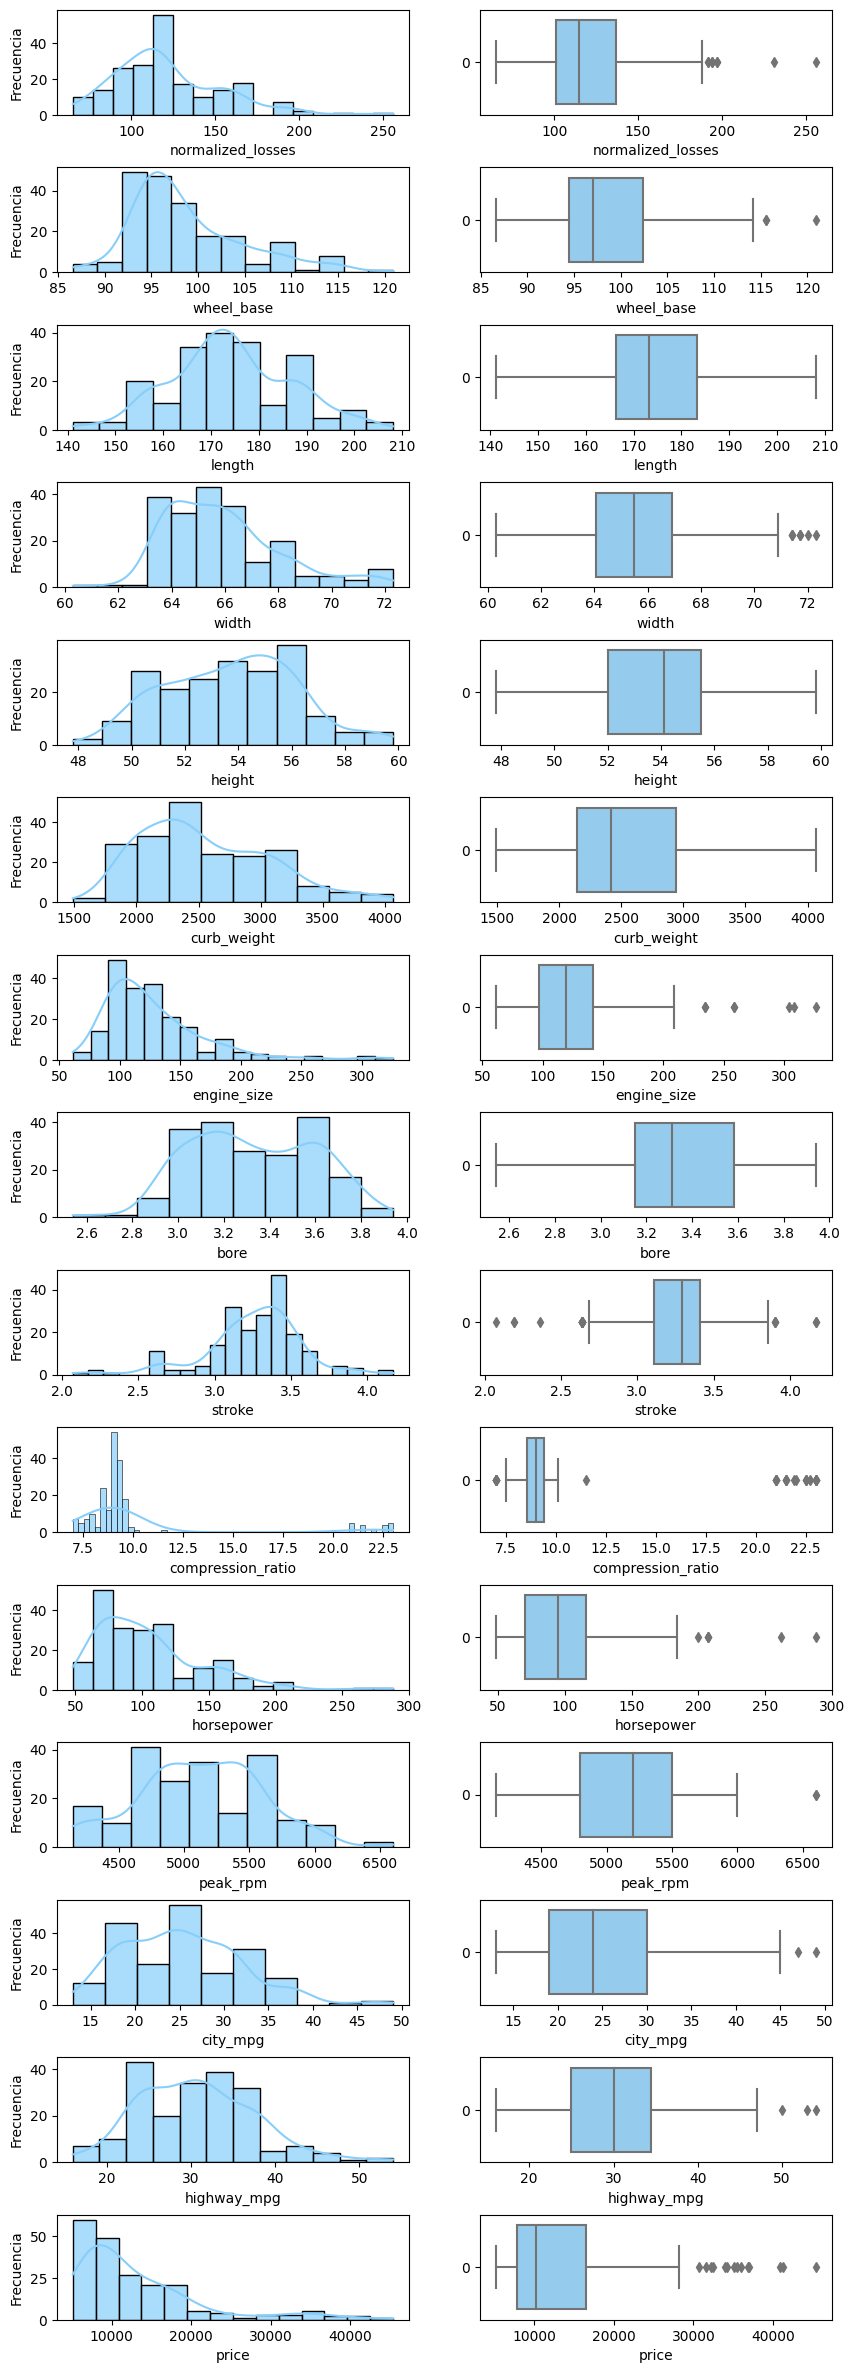

In [1301]:
variables = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
             'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
             'highway_mpg', 'price']

# Configuración de la matriz de gráficos
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(10, 30))
fig.subplots_adjust(hspace=0.5)

# Generar histogramas y boxplots para cada variable
for i, variable in enumerate(variables):
    ax_hist = axes[i, 0]
    ax_box = axes[i, 1]

    # Histograma
    sns.histplot(df[variable], ax=ax_hist, kde=True, bins='auto', color="lightskyblue", alpha=0.7)
    ax_hist.set_xlabel(variable)
    ax_hist.set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(df[variable], ax=ax_box, color="lightskyblue", orient='h')
    ax_box.set_xlabel(variable)

plt.show()

#### ***Variables Categóricas***

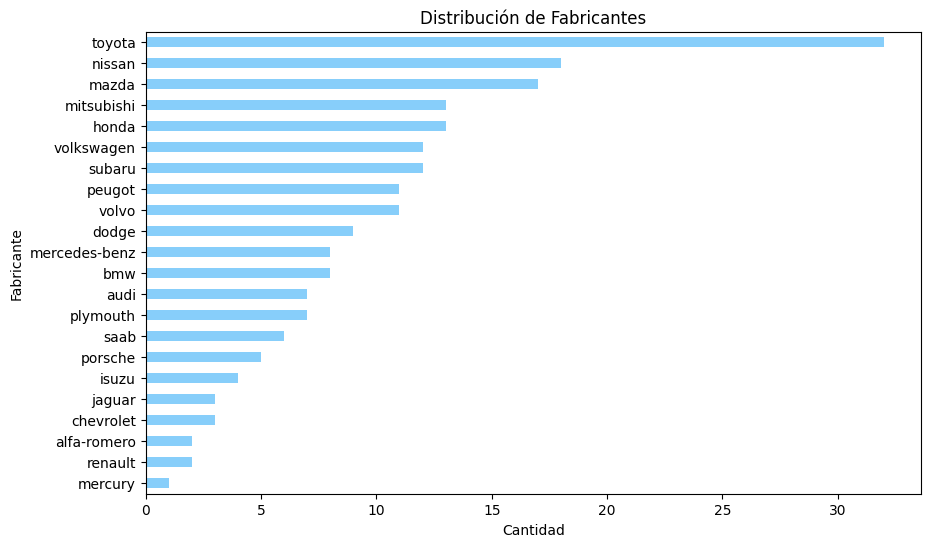

In [1302]:
# Configuración del gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el gráfico de barras horizontal para 'make'
value_counts = df['make'].value_counts().sort_values(ascending=True)
value_counts.plot(kind='barh', ax=ax, color='lightskyblue')

ax.set_title('Distribución de Fabricantes')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Fabricante')

plt.show()

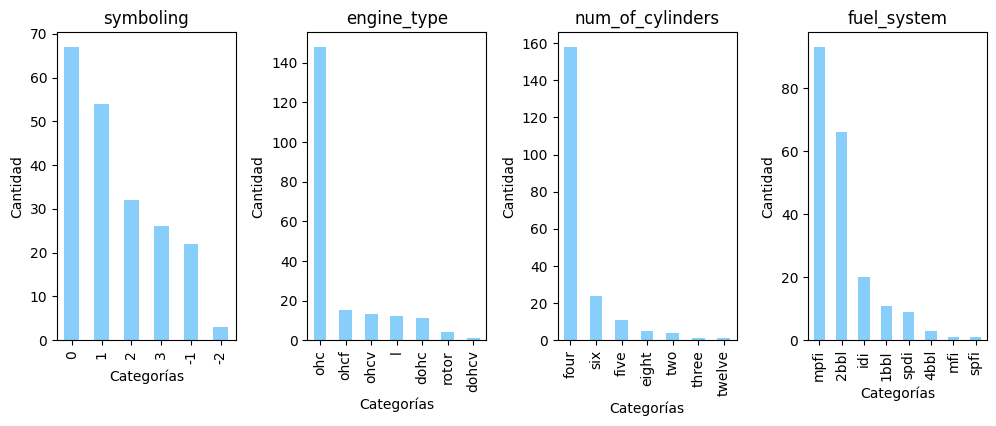

In [1303]:
variables = ['symboling', 'engine_type', 'num_of_cylinders', 'fuel_system']

# Configuración del gráfico de barras
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)

# Generar los gráficos de barras para cada variable
for i, variable in enumerate(variables):
    ax = axes[i]
    value_counts = df[variable].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='lightskyblue')
    ax.set_title(variable)
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Cantidad')

plt.show()


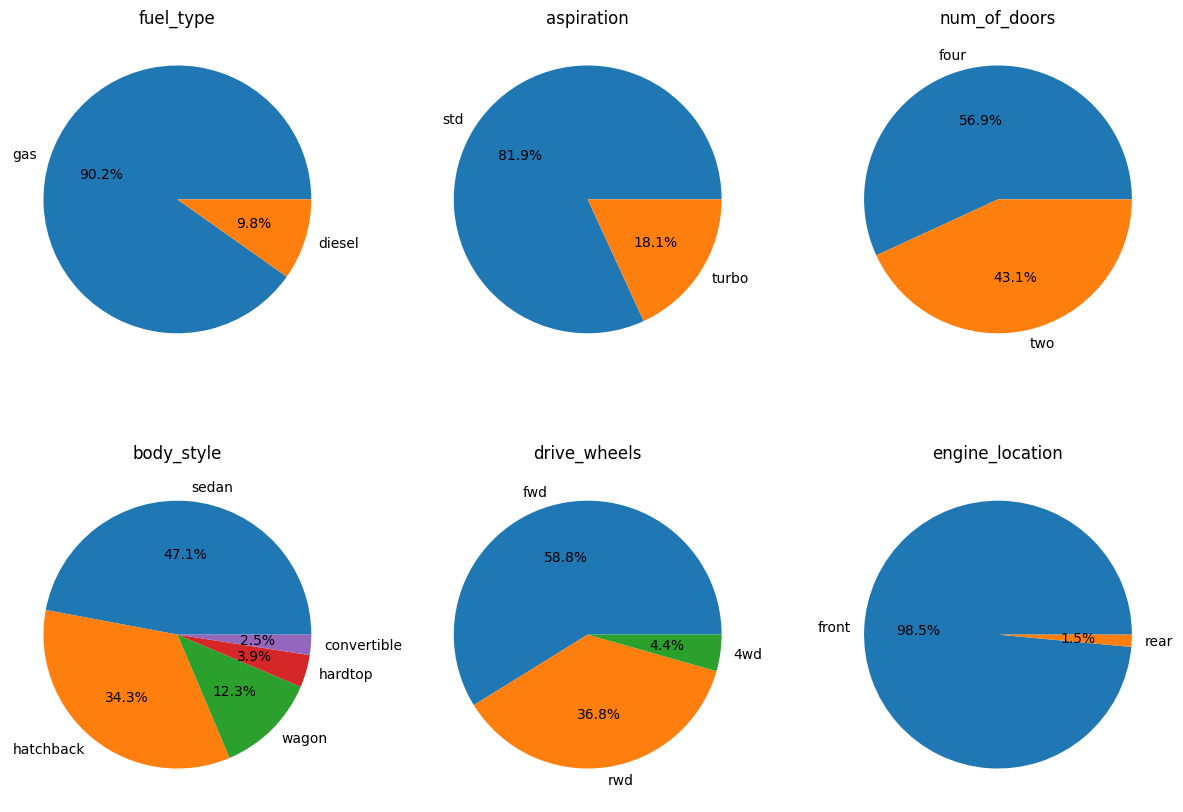

In [1304]:
variables = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location']

# Configuración de la matriz de gráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)

# Generar los gráficos de pastel para cada variable
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    value_counts = df[variable].value_counts()
    colors = plt.cm.tab10(range(len(value_counts)))  # Paleta de colores tab10
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(variable)


plt.show()


### **Análisis Multivariado**

### **Análisis y tratamiento de atípicos**

## **2. Modelos predictivos**

Entrena modelos predictivos (al menos 3) que te permitirán estimar la calificación de riesgo del seguro de un automóvil a partir de los valores de las otras variables. Elija el mejor modelo, buscando sus parámetros óptimos. Debe incluir un apartado en el que establezcas los protocolos de evaluación y los procesos de formación y evaluación de los modelos.

### Evaluar la necesidad de agrupar la variable objetivo con el proposito de balancear las clases porque sino sesgas el modelo.

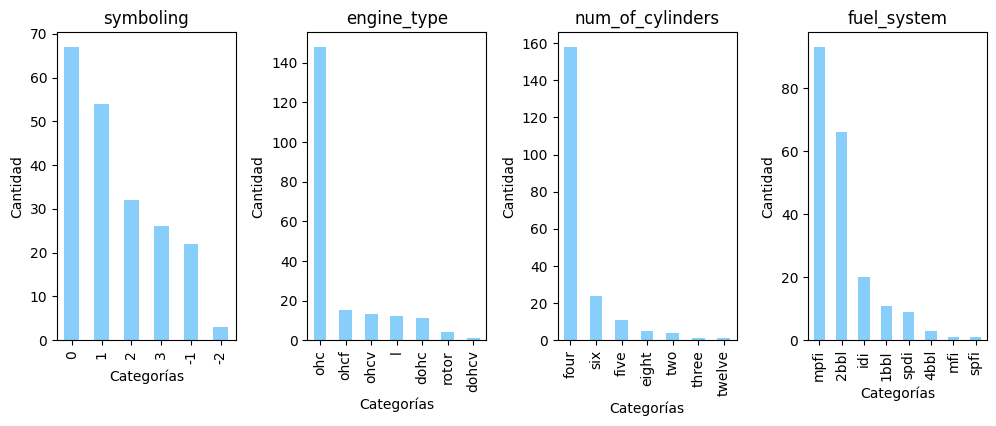

In [1305]:
variables = ['symboling', 'engine_type', 'num_of_cylinders', 'fuel_system']

# Configuración del gráfico de barras
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)

# Generar los gráficos de barras para cada variable
for i, variable in enumerate(variables):
    ax = axes[i]
    value_counts = df[variable].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='lightskyblue')
    ax.set_title(variable)
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Cantidad')

plt.show()


### **2.1. KNN**

#### **2.1.1. Implementación del Modelo**

In [1306]:
#Solo dejamos algunas la variables 
data = df.copy()
data

symboling  normalized_losses         make fuel_type aspiration  \
0            3              115.0  alfa-romero       gas        std   
1            1              115.0  alfa-romero       gas        std   
2            2              164.0         audi       gas        std   
3            2              164.0         audi       gas        std   
4            2              115.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
199         -1               95.0        volvo       gas        std   
200         -1               95.0        volvo       gas      turbo   
201         -1               95.0        volvo       gas        std   
202         -1               95.0        volvo    diesel      turbo   
203         -1               95.0        volvo       gas      turbo   

    num_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two    hatchback          rwd           front        94.5  ...   
2           four        sedan          fwd           front        99.8  ...   
3           four        sedan          4wd           front        99.4  ...   
4            two        sedan          fwd           front        99.8  ...   
..           ...          ...          ...             ...         ...  ...   
199         four        sedan          rwd           front       109.1  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   

     engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
0          130.0         mpfi  3.47    2.68               9.0      111.0   
1          152.0         mpfi  2.68    3.47               9.0      154.0   
2          109.0         mpfi  3.19    3.40              10.0      102.0   
3          136.0         mpfi  3.19    3.40               8.0      115.0   
4          136.0         mpfi  3.19    3.40               8.5      110.0   
..           ...          ...   ...     ...               ...        ...   
199        141.0         mpfi  3.78    3.15               9.5      114.0   
200        141.0         mpfi  3.78    3.15               8.7      160.0   
201        173.0         mpfi  3.58    2.87               8.8      134.0   
202        145.0          idi  3.01    3.40              23.0      106.0   
203        141.0         mpfi  3.78    3.15               9.5      114.0   

     peak_rpm city_mpg  highway_mpg    price  
0      5000.0     21.0         27.0  16500.0  
1      5000.0     19.0         26.0  16500.0  
2      5500.0     24.0         30.0  13950.0  
3      5500.0     18.0         22.0  17450.0  
4      5500.0     19.0         25.0  15250.0  
..        ...      ...          ...      ...  
199    5400.0     23.0         28.0  16845.0  
200    5300.0     19.0         25.0  19045.0  
201    5500.0     18.0         23.0  21485.0  
202    4800.0     26.0         27.0  22470.0  
203    5400.0     19.0         25.0  22625.0  

[204 rows x 26 columns]

In [1307]:
depVar = data['symboling']
numericVars = data[['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
             'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
             'highway_mpg', 'price']]


In [1308]:
# Particionar de los datos Holdout (split)
X_train, X_test, y_train, y_test = train_test_split(numericVars, depVar, random_state=1234, test_size = 0.25)

# Dividir los datos en conjuntos de entrenamiento y prueba utilizando train_test_split.
# X_train y y_train son los datos de entrenamiento.
# X_test y y_test son los datos de prueba.
# Se utiliza un tamaño de prueba del 25% y una semilla aleatoria de 1234 para la reproducibilidad.

In [1309]:
# Revisar que el set de datos quede partido
X_train.shape

(153, 15)

In [1310]:
X_train

normalized_losses  wheel_base  length  width  height  curb_weight  \
117              119.0        93.7   157.3   63.8    50.8       1918.0   
17               121.0        88.4   141.1   60.3    53.2       1488.0   
11               188.0       101.2   176.8   64.8    54.3       2710.0   
106              161.0       107.9   186.7   68.4    56.7       3020.0   
141              102.0        97.2   172.0   65.4    52.5       2190.0   
..                 ...         ...     ...    ...     ...          ...   
152               77.0        95.7   169.7   63.6    59.1       2280.0   
116              161.0       108.0   186.7   68.3    56.0       3130.0   
53               113.0        93.1   166.8   64.2    54.1       1950.0   
38                85.0        96.5   175.4   65.2    54.1       2304.0   
47               115.0       113.0   199.6   69.6    52.8       4066.0   

     engine_size  bore  stroke  compression_ratio  horsepower  peak_rpm  \
117         90.0  2.97    3.23                9.4        68.0    5500.0   
17          61.0  2.91    3.03                9.5        48.0    5100.0   
11         164.0  3.31    3.19                9.0       121.0    4250.0   
106        120.0  3.46    3.19                8.4        97.0    5000.0   
141        108.0  3.62    2.64                9.5        82.0    4400.0   
..           ...   ...     ...                ...         ...       ...   
152         92.0  3.05    3.03                9.0        62.0    4800.0   
116        134.0  3.61    3.21                7.0       142.0    5600.0   
53          91.0  3.08    3.15                9.0        68.0    5000.0   
38         110.0  3.15    3.58                9.0        86.0    5800.0   
47         258.0  3.63    4.17                8.1       176.0    4750.0   

     city_mpg  highway_mpg    price  
117      37.0         41.0   5572.0  
17       47.0         53.0   5151.0  
11       21.0         28.0  20970.0  
106      19.0         24.0  11900.0  
141      28.0         33.0   7775.0  
..        ...          ...      ...  
152      31.0         37.0   6918.0  
116      18.0         24.0  18150.0  
53       31.0         38.0   7395.0  
38       27.0         33.0   8845.0  
47       15.0         19.0  35550.0  

[153 rows x 15 columns]

In [1311]:
# Reescalar las variables predictivas para que tengan la misma importancia, meidante un proceso de estandarización.
x = X_train.values
x_std = StandardScaler().fit_transform(x)
X_train_std = pd.DataFrame(x_std)
X_train_std.columns=numericVars.columns[:]

In [1312]:
X_train_std.mean(axis=0)

normalized_losses   -5.805088e-17
wheel_base          -7.720767e-16
length               4.121612e-16
width                1.137797e-15
height              -3.715256e-16
curb_weight         -8.127123e-17
engine_size          1.567374e-16
bore                -7.256360e-16
stroke              -1.596399e-15
compression_ratio    2.089832e-16
horsepower          -2.322035e-17
peak_rpm            -7.524845e-16
city_mpg            -1.015890e-16
highway_mpg          1.959217e-16
price                4.353816e-17
dtype: float64

In [1313]:
X_train_std.std(axis=0)

normalized_losses    1.003284
wheel_base           1.003284
length               1.003284
width                1.003284
height               1.003284
curb_weight          1.003284
engine_size          1.003284
bore                 1.003284
stroke               1.003284
compression_ratio    1.003284
horsepower           1.003284
peak_rpm             1.003284
city_mpg             1.003284
highway_mpg          1.003284
price                1.003284
dtype: float64

In [1314]:
x = X_test.values # Obtener los valores de X_test
x_std = StandardScaler().fit_transform(x) # Estandarizar los valores de x
X_test_std = pd.DataFrame(x_std) # Crear un nuevo DataFrame con los valores estandarizados
X_test_std.columns=numericVars.columns[:] # Asignar los nombres de columna de numericVars a X_test_std

In [1315]:
X_test_std.mean(axis=0)

normalized_losses    2.176908e-17
wheel_base           1.734451e-15
length               2.745625e-16
width               -3.943469e-15
height               6.654807e-15
curb_weight          9.360704e-17
engine_size          1.088454e-18
bore                 1.898264e-15
stroke               2.237861e-15
compression_ratio   -3.700743e-16
horsepower           5.442270e-18
peak_rpm             9.197436e-17
city_mpg             2.106158e-16
highway_mpg          1.700709e-17
price               -9.469549e-17
dtype: float64

In [1316]:
X_test_std.std(axis=0)

normalized_losses    1.00995
wheel_base           1.00995
length               1.00995
width                1.00995
height               1.00995
curb_weight          1.00995
engine_size          1.00995
bore                 1.00995
stroke               1.00995
compression_ratio    1.00995
horsepower           1.00995
peak_rpm             1.00995
city_mpg             1.00995
highway_mpg          1.00995
price                1.00995
dtype: float64

In [1317]:
# Entrenar varios modelos knn para encontrar el k más apropiado.
acc_train_vec=[]
acc_test_vec=[]
k_vec= np.arange(1,15,2) # Inicia en 1, termina en 15 y avanza de a 2
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred_KNN = knn.predict(X_train_std)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred_KNN))
    y_pred_KNN = knn.predict(X_test_std)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred_KNN))
print(acc_train_vec)
print(acc_test_vec)
print(k_vec)

[1.0, 0.7777777777777778, 0.7516339869281046, 0.6797385620915033, 0.6143790849673203, 0.5947712418300654, 0.6013071895424836]
[0.7843137254901961, 0.6862745098039216, 0.6078431372549019, 0.49019607843137253, 0.47058823529411764, 0.49019607843137253, 0.47058823529411764]
[ 1  3  5  7  9 11 13]


#### **2.1.2. Evaluación del Modelo**

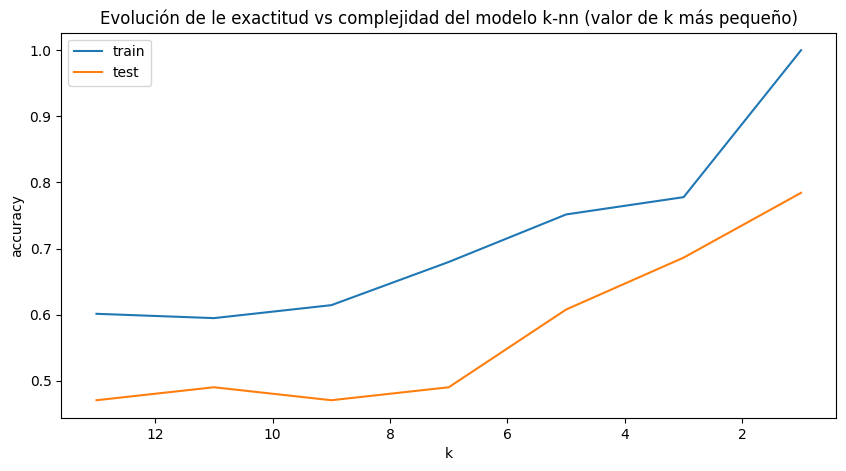

In [1318]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

In [1319]:
#Ahora vamos a trabajar con K=2
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_std, y_train)
y_pred_KNN = knn.predict(X_train_std)
print("Clases reales   : ", y_train)
print("Clases predichas: ", y_pred_KNN)

Clases reales   :  117    1
17     2
11     0
106    0
141    0
      ..
152    0
116    0
53     1
38     0
47     0
Name: symboling, Length: 153, dtype: int64
Clases predichas:  [ 1  0  0  0  0  1  1 -1  1 -1 -1 -1 -1  2  1  2  0 -1  0  1  2  1  2  0
  0 -2  0  1  0  2  3  0 -1 -1  0 -1 -2  1  0  1  0  0  3  3  1  0  2  0
  0  2  0  0 -1 -1 -2  1  1  3  0 -2  1  1  2 -1  0  1  1  0  0  1  3  0
  1  2  1 -2  1  0  1  3  0  1  3  0  3  0  3  1  0  0  3 -1  0 -1  1  0
 -1 -1 -1  0  1  0  1  1  1  0  2  1 -1 -1 -1  3  0  2  0  0  0  0  0  0
  0  0  2  2 -1  2  2  0  0  1  1 -1  3  1 -1  0  1  2  1  1  3  0  2  1
  0  1  3  0  0  0  1  0  0]


In [1320]:
# Costruir Matriz de cofusión
cm_KNN= metrics.confusion_matrix(y_train, y_pred_KNN)

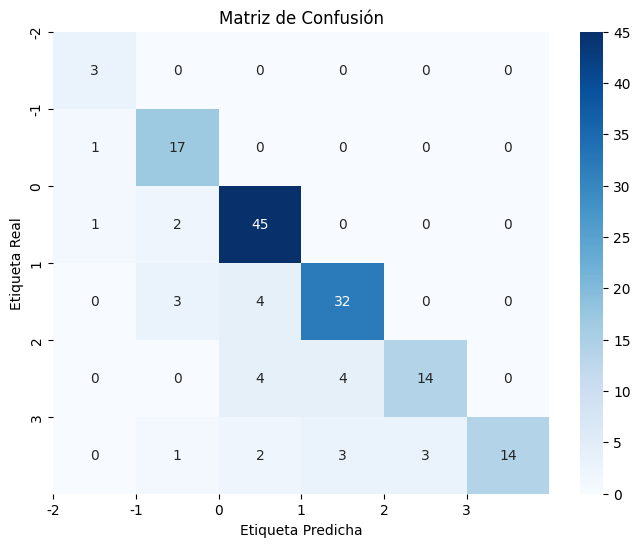

In [1321]:
# Obtener los valores únicos de la variable dependiente (depVar)
unique_values = np.unique(depVar) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

In [1322]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de entrenamiento
print("Exactitud: ", metrics.accuracy_score(y_train, y_pred_KNN))
print("Kappa    : ", metrics.cohen_kappa_score(y_train, y_pred_KNN))
print("Precisión     : ", metrics.precision_score(y_train, y_pred_KNN, labels='symboling', average='macro'))
print("Recall        : ", metrics.recall_score(y_train, y_pred_KNN, labels='symboling', average='macro'))
VN = cm_KNN[1,1]
FP = cm_KNN[1,0]
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_train, y_pred_KNN, labels='symboling', average='macro'))

Exactitud:  0.8169934640522876
Kappa    :  0.7636152954808806
Precisión     :  0.6859077836059934
Recall        :  0.7067880790706879
Especificidad :  0.9444444444444444
F1-score      :  0.6783247136668875


In [1323]:
y_pred_KNN = knn.predict(X_test_std)
print("Clases reales   : ", y_test)
print("Clases predichas: ", y_pred_KNN)

Clases reales   :  5      1
101    0
29     2
6      1
51     1
31     1
173   -1
160    0
83     3
7      1
191    0
65     0
157    0
129    0
40     0
176   -1
134    2
108    0
54     3
43     1
180   -1
99     0
94     1
136    2
104    3
91     1
201   -1
144    0
168    2
9      2
58     1
181    2
77     2
59     0
74     1
111    0
63     0
97     2
95     1
159    0
48     0
165    1
88     1
32     1
153    0
102    0
187    2
39     0
25     1
137    2
142    0
Name: symboling, dtype: int64
Clases predichas:  [ 0 -1  2 -1  1  1  0  0  3  0  0  0  0  2  0 -1 -2  0  3  0 -1  0  1 -2
  1  1 -1  0  2  0  0  2  1  0 -2  0  0  1  1  0  1  1  1  0  0 -1  2  0
  1  2  0]


In [1324]:
# Obtenemos la matriz de confusión sobre el conjunto de prueba.
cm_KNN= metrics.confusion_matrix(y_test, y_pred_KNN)

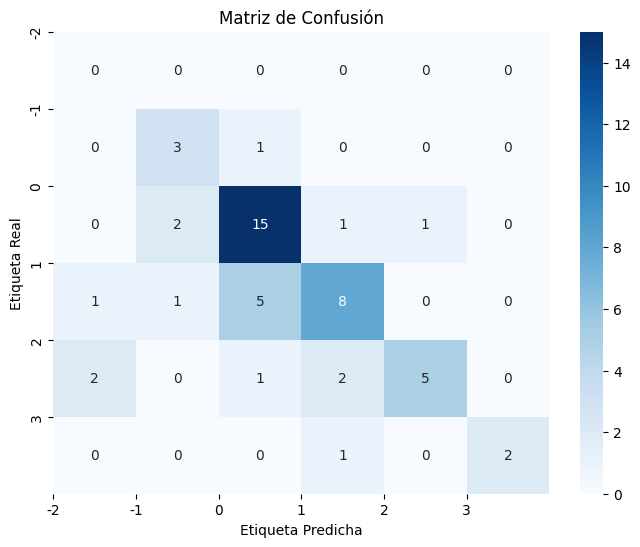

In [1325]:
# Obtener los valores únicos de la variable dependiente (depVar)
unique_values = np.unique(depVar) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

In [1326]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred_KNN))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred_KNN))
print("Precisión     : ", metrics.precision_score(y_test, y_pred_KNN, labels='symboling', average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred_KNN, labels='symboling', average='macro'))
VN = cm_KNN[1,1] #OJO aqui o estoy seguro de este edazo
FP = cm_KNN[1,0] #OJO aqui o estoy seguro de este edazo
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred_KNN, labels='symboling', average='macro'))

Exactitud:  0.6470588235294118
Kappa    :  0.5201254573967589
Precisión     :  0.525974025974026
Recall        :  0.462781954887218
Especificidad :  1.0
F1-score      :  0.4784714156665376


In [1327]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
#knn = neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_validate(knn, numericVars, depVar, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f" % (key, score.mean()))

fit_time: 0.00
score_time: 0.01
test_accuracy: 0.41
test_precision_weighted: 0.42
test_recall_weighted: 0.41
test_f1_weighted: 0.37


### **2.2. Bagging**

#### **2.2.1. Implementación del Modelo**

In [1328]:
base_classifier = DecisionTreeClassifier() #Seleccionamos el metodo de clasificación, en este caso árboles de decisión 

bagging_model = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42) #Generamos el modelo 
bagging_model.fit(X_train, y_train) #Entrenamos el modelo 


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [1329]:
y_pred_bgg = bagging_model.predict(X_train) 
cm_bgg= metrics.confusion_matrix(y_train, y_pred_bgg)

In [1330]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba
print("Exactitud     : ", metrics.accuracy_score(y_train, y_pred_bgg))
print("Kappa         : ", metrics.cohen_kappa_score(y_train, y_pred_bgg))
print("Precisión     : ", metrics.precision_score(y_train, y_pred_bgg, labels='symboling', average='macro'))
print("Recall        : ", metrics.recall_score(y_train, y_pred_bgg, labels='symboling', average='macro'))
VN = cm_bgg[1,1] #OJO aqui no estoy seguro de este edazo
FP = cm_bgg[1,0] #OJO aqui o estoy seguro de este edazo
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_train, y_pred_bgg, labels='symboling', average='macro'))

Exactitud     :  0.9803921568627451
Kappa         :  0.9747982210508978
Precisión     :  0.8433754454162617
Recall        :  0.840018978605935
Especificidad :  1.0
F1-score      :  0.8416134838815251


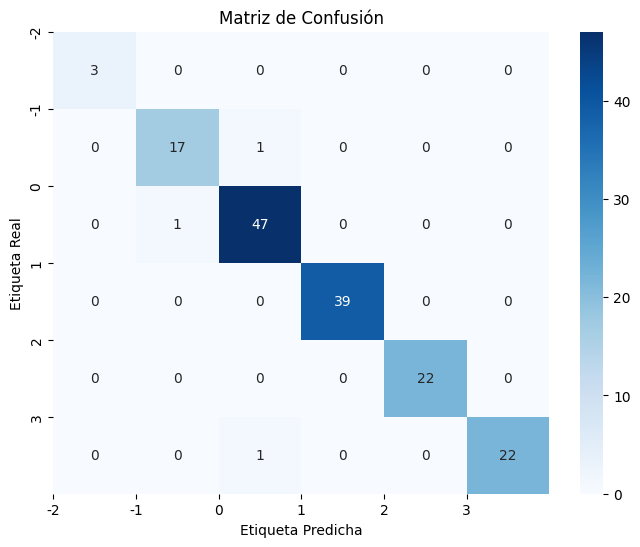

In [1331]:
# Obtener los valores únicos de la variable dependiente (depVar)
unique_values = np.unique(depVar) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bgg, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

In [1332]:
y_pred_bgg = bagging_model.predict(X_test) 
cm_bgg= metrics.confusion_matrix(y_test, y_pred_bgg)

In [1333]:
#Encontramos los valores de exactitud, kappa, precisión, sensibilidad, especificidad y F1-score sobre los datos de prueba
print("Exactitud     : ", metrics.accuracy_score(y_test, y_pred_bgg))
print("Kappa         : ", metrics.cohen_kappa_score(y_test, y_pred_bgg))
print("Precisión     : ", metrics.precision_score(y_test, y_pred_bgg, labels='symboling', average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred_bgg, labels='symboling', average='macro'))
VN = cm_bgg[1,1] #OJO aqui no estoy seguro de este edazo
FP = cm_bgg[1,0] #OJO aqui o estoy seguro de este edazo
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred_bgg, labels='symboling', average='macro'))

Exactitud     :  0.7843137254901961
Kappa         :  0.6982248520710059
Precisión     :  0.6922222222222222
Recall        :  0.660672514619883
Especificidad :  1.0
F1-score      :  0.652677569344236


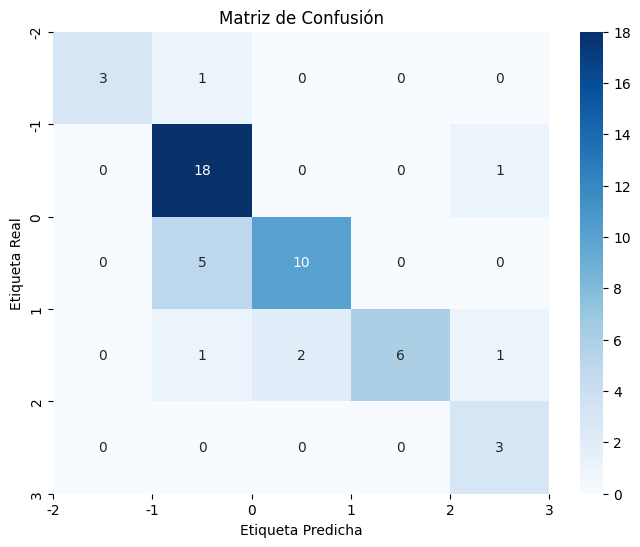

In [1334]:
# Obtener los valores únicos de la variable dependiente (depVar)
unique_values = np.unique(depVar) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bgg, annot=True, fmt="d", cmap="Blues")

# Obtener la cantidad de etiquetas únicas
num_labels = len(unique_values)

# Establecer los nombres de las etiquetas en los ejes x e y
plt.xticks(np.arange(num_labels), unique_values)
plt.yticks(np.arange(num_labels), unique_values)

plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

#### **2.2.2. Evaluación del Modelo**

In [1335]:


# Crear el modelo Bagging
#bagging_model = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Crear el generador LOOCV
loo = LeaveOneOut()

# Realizar la validación cruzada LOOCV y obtener las predicciones
y_pred = cross_val_predict(bagging_model, numericVars, depVar, cv=loo)

cm = confusion_matrix(depVar, y_pred)
# Calcular las métricas
accuracy = metrics.accuracy_score(depVar, y_pred)
kappa = metrics.cohen_kappa_score(depVar, y_pred)
precision = metrics.precision_score(depVar, y_pred, average='macro')
recall = metrics.recall_score(depVar, y_pred, average='macro')
specificity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = metrics.f1_score(depVar, y_pred, average='macro')

# Imprimir las métricas
print("Exactitud     : ", accuracy)
print("Kappa         : ", kappa)
print("Precisión     : ", precision)
print("Recall        : ", recall)
print("Especificidad : ", specificity)
print("F1-score      : ", f1_score)

Exactitud     :  0.8137254901960784
Kappa         :  0.7551639188933106
Precisión     :  0.8539856397751134
Recall        :  0.77712019013325
Especificidad :  1.0
F1-score      :  0.807545177131395


### **2.3. Xgboost**

#### **2.3.1. Implementación del Modelo**

In [1336]:
y = data['symboling']
X = data[['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
             'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
             'highway_mpg', 'price']]

In [1337]:
valores_unicos = np.unique(y)
print(valores_unicos)

[-2 -1  0  1  2  3]


0 para bajo riesgo
1 para alto riesgo

In [1338]:
# converimos los valores de la variable. OJO el orden es importante para no dañar los datos
y[y == 0] = 0
y[y == 1] = 1
y[y == 2] = 1
y[y == 3] = 1
y[y == -2] = 0
y[y == -1] = 0

In [1339]:
valores_unicos = np.unique(y)
print(valores_unicos)

[0 1]


In [1340]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y) # Crear data_dmatrix utilizando los datos de entrada (X) y las etiquetas correspondientes (y).

In [1341]:
xgb_classifier = xgb.XGBClassifier() # Crear un clasificador XGBoost utilizando la clase XGBClassifier.

In [1342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
# Dividir los datos en conjuntos de entrenamiento y prueba utilizando train_test_split.
# X_train y y_train son los datos de entrenamiento.
# X_test y y_test son los datos de prueba.
# Se utiliza un tamaño de prueba del 20% y una semilla aleatoria de 0 para la reproducibilidad.

In [1343]:
# Declarar los parámetros
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
                      
# Instanciar el clasificador 
xgb_clf = XGBClassifier(**params)

# Ajustar el clasificador a los datos de entrenamiento
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

Predecimos con XGBoost y calculamos su exactitud.

In [1344]:
# Hacer predicciones en los datos de prueba (X_test) y las predicciones resultantes se almacenarlas en la variable y_pred.
y_pred_xgb = xgb_clf.predict(X_test)

In [1345]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb))) 
# se imprime la precisión del modelo XGBoost. Se utiliza la función accuracy_score para comparar las etiquetas 
# reales (y_test) con las etiquetas predichas (y_pred) y calcular la precisión del modelo.

XGBoost model accuracy score: 0.7805


#### **2.3.2. Evaluación del Modelo**

In [1346]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

# Se definen los parámetros del modelo XGBoost, incluyendo la función objetivo ("binary:logistic"),
# la fracción de características por árbol ('colsample_bytree'), la tasa de aprendizaje ('learning_rate'),
# la profundidad máxima del árbol ('max_depth') y el valor de regularización ('alpha').


xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

# Se realiza una validación cruzada (cross-validation) utilizando el método cv() de XGBoost.
# Se proporciona la matriz de datos de entrenamiento (data_dmatrix) y los parámetros definidos.
# Se especifica un número de folds (nfold) de 3, el número de rondas de impulso (num_boost_round) de 50,
# el número de rondas de parada temprana (early_stopping_rounds) de 10, y la métrica de evaluación (metrics) "auc".

**nfold:** 

En el contexto de XGBoost se refiere al número de folds (divisiones) que se utilizan en la validación cruzada (cross-validation). La validación cruzada es una técnica que se utiliza para evaluar el rendimiento de un modelo de machine learning de manera más robusta y reducir el sesgo de la evaluación en un único conjunto de datos de prueba.

En la validación cruzada, los datos se dividen en k folds (subconjuntos) de aproximadamente igual tamaño. Luego, se realizan k iteraciones en las que se utiliza un fold diferente como conjunto de prueba y los restantes k-1 folds se utilizan como conjunto de entrenamiento. Esto permite evaluar el modelo k veces utilizando diferentes combinaciones de datos de entrenamiento y prueba.

El parámetro nfold especifica el número de folds que se utilizarán en la validación cruzada. Por ejemplo, si se establece nfold=5, se realizará una validación cruzada de 5 folds, donde los datos se dividirán en 5 subconjuntos y se realizarán 5 iteraciones de entrenamiento y prueba. Cuanto mayor sea el valor de nfold, mayor será la cantidad de evaluaciones realizadas y más robusta será la estimación del rendimiento del modelo.


**num_boost_round:**

Especifica el número de rondas de impulso o iteraciones que se llevarán a cabo durante el entrenamiento del modelo. Cada ronda de impulso corresponde a la construcción de un nuevo árbol en el ensamblaje de árboles de XGBoost.

En cada ronda de impulso, se agrega un nuevo árbol al modelo para mejorar la capacidad de predicción. Cada árbol se construye de manera secuencial, y en cada iteración se ajustan los pesos de los ejemplos de entrenamiento para minimizar la función de pérdida del modelo.

El parámetro num_boost_round indica la cantidad deseada de rondas de impulso a realizar durante el entrenamiento. Aumentar este valor puede permitir que el modelo aprenda patrones más complejos y mejore su rendimiento, pero también puede aumentar el riesgo de sobreajuste si se establece demasiado alto.

Es importante ajustar adecuadamente el valor de num_boost_round según el conjunto de datos y el problema específico que se está abordando. Puede requerir un ajuste fino mediante la validación cruzada para determinar el número óptimo de rondas de impulso para obtener un equilibrio entre el rendimiento y la capacidad de generalización del modelo.

**early_stopping_rounds:**

Permite realizar la detención temprana durante el entrenamiento del modelo si no se observa una mejora en la métrica de evaluación deseada.

Durante el entrenamiento de XGBoost, se evalúa periódicamente el rendimiento del modelo en un conjunto de datos de validación. El parámetro early_stopping_rounds especifica el número de rondas consecutivas en las que no se observa una mejora en la métrica de evaluación antes de detener el entrenamiento.

Si después de un número determinado de rondas consecutivas no se produce una mejora en la métrica de evaluación, el entrenamiento se detiene y se devuelve el modelo con el mejor rendimiento hasta ese punto.

Esta técnica es útil para evitar el sobreajuste y reducir el tiempo de entrenamiento. Al detener el entrenamiento cuando no se observa una mejora, se evita el gasto de recursos computacionales en rondas adicionales que no contribuyen significativamente a la mejora del modelo.

Es importante ajustar adecuadamente el valor de early_stopping_rounds, ya que un valor demasiado bajo puede hacer que el entrenamiento se detenga prematuramente, mientras que un valor demasiado alto puede prolongar el entrenamiento innecesariamente. Por lo general, se elige un valor que permita un margen razonable para la mejora y la variabilidad de la métrica de evaluación.

In [1347]:
xgb_cv.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.835989       0.041224       0.785187      0.086979
1        0.894632       0.053109       0.838145      0.077291
2        0.896346       0.049017       0.845518      0.081328
3        0.913990       0.031528       0.870183      0.084369
4        0.918315       0.036995       0.890637      0.069463

In [1348]:
#  imprime el último valor de la métrica AUC promedio obtenida en la validación cruzada del modelo XGBoost
print((xgb_cv["test-auc-mean"]).tail(1)) 

14    0.896215
Name: test-auc-mean, dtype: float64


Se puede observar que que su AUC para la predicción del nivel de riesgo ha mejorado en comparación a el anteiror (0.78) y ahora resultó ser de alrededor de 0.89.

Importancia de las variables independientes

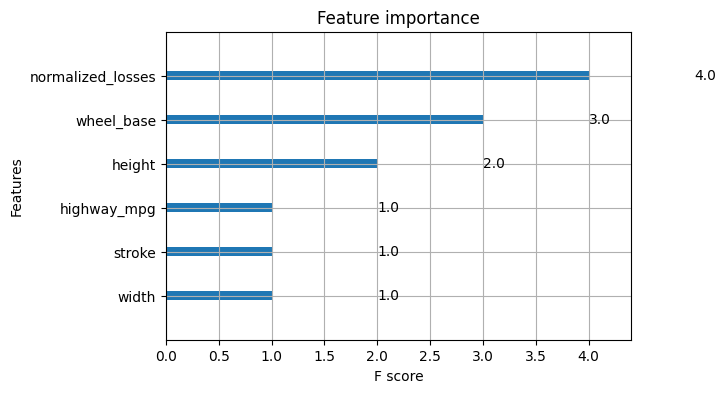

In [1349]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

## **3. Reducción de dimensionalidad**

Considerando todas las variables, realizar un análisis de componentes principales (PCA), eligiendo el número de componentes necesarios para conservar al menos el 80% de la representación original.

In [1350]:
dataDepurado = df.copy()
dataDepurado = dataDepurado[['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
             'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
             'highway_mpg', 'price']]
dataDepurado                 

symboling  normalized_losses  wheel_base  length  width  height  \
0            3              115.0        88.6   168.8   64.1    48.8   
1            1              115.0        94.5   171.2   65.5    52.4   
2            2              164.0        99.8   176.6   66.2    54.3   
3            2              164.0        99.4   176.6   66.4    54.3   
4            2              115.0        99.8   177.3   66.3    53.1   
..         ...                ...         ...     ...    ...     ...   
199         -1               95.0       109.1   188.8   68.9    55.5   
200         -1               95.0       109.1   188.8   68.8    55.5   
201         -1               95.0       109.1   188.8   68.9    55.5   
202         -1               95.0       109.1   188.8   68.9    55.5   
203         -1               95.0       109.1   188.8   68.9    55.5   

     curb_weight  engine_size  bore  stroke  compression_ratio  horsepower  \
0         2548.0        130.0  3.47    2.68                9.0       111.0   
1         2823.0        152.0  2.68    3.47                9.0       154.0   
2         2337.0        109.0  3.19    3.40               10.0       102.0   
3         2824.0        136.0  3.19    3.40                8.0       115.0   
4         2507.0        136.0  3.19    3.40                8.5       110.0   
..           ...          ...   ...     ...                ...         ...   
199       2952.0        141.0  3.78    3.15                9.5       114.0   
200       3049.0        141.0  3.78    3.15                8.7       160.0   
201       3012.0        173.0  3.58    2.87                8.8       134.0   
202       3217.0        145.0  3.01    3.40               23.0       106.0   
203       3062.0        141.0  3.78    3.15                9.5       114.0   

     peak_rpm  city_mpg  highway_mpg    price  
0      5000.0      21.0         27.0  16500.0  
1      5000.0      19.0         26.0  16500.0  
2      5500.0      24.0         30.0  13950.0  
3      5500.0      18.0         22.0  17450.0  
4      5500.0      19.0         25.0  15250.0  
..        ...       ...          ...      ...  
199    5400.0      23.0         28.0  16845.0  
200    5300.0      19.0         25.0  19045.0  
201    5500.0      18.0         23.0  21485.0  
202    4800.0      26.0         27.0  22470.0  
203    5400.0      19.0         25.0  22625.0  

[204 rows x 16 columns]

In [1351]:
dataDepurado.shape

(204, 16)

In [1352]:
# Obtener los datos sin la primera columna
data = dataDepurado.iloc[:, 1:]

# Realizar la estandarización de los datos
scaler = StandardScaler()
dataStd = scaler.fit_transform(data)

# Crear un DataFrame a partir del array estandarizado
dataStd = pd.DataFrame(dataStd, columns=data.columns)

# Asignar los nombres de las columnas
dataStd.columns = data.columns

In [1353]:
dataStd.mean(axis=0)

normalized_losses    1.044916e-16
wheel_base          -8.272250e-16
length              -1.340975e-15
width               -1.802480e-15
height              -3.204408e-15
curb_weight         -2.438137e-16
engine_size          5.115734e-17
bore                 2.089832e-16
stroke               3.308900e-16
compression_ratio   -5.137503e-16
horsepower           1.349683e-16
peak_rpm             4.353816e-16
city_mpg             2.786442e-16
highway_mpg          1.741526e-17
price                6.966105e-17
dtype: float64

In [1354]:
dataStd.std(axis=0)

normalized_losses    1.00246
wheel_base           1.00246
length               1.00246
width                1.00246
height               1.00246
curb_weight          1.00246
engine_size          1.00246
bore                 1.00246
stroke               1.00246
compression_ratio    1.00246
horsepower           1.00246
peak_rpm             1.00246
city_mpg             1.00246
highway_mpg          1.00246
price                1.00246
dtype: float64

Reducción de dimensionalidad con PCA

Vamos a buscar una mejor representación de los datos que nos permita conservar la mayor cantidad de información a través de la transformación de las 6 variables originales en componentes principales.

In [1355]:
pca = PCA()
pca.fit(dataStd.iloc[:, :])

PCA()

Una vez ajustado el objeto PCA a un dataset, este permite acceder a diferentes aspectos resultantes de la transformación

In [1356]:
pca.components_

array([[ 2.42729520e-02,  2.89977379e-01,  3.30387002e-01,
         3.27149643e-01,  1.06068542e-01,  3.55401654e-01,
         3.20942689e-01,  2.63148403e-01,  5.28401681e-02,
         1.50522075e-02,  2.94571184e-01, -7.73715783e-02,
        -3.06285460e-01, -3.16458005e-01,  3.15587821e-01],
       [-3.17470611e-01,  2.75060251e-01,  1.57229098e-01,
         8.28532321e-02,  4.30436235e-01,  5.04233614e-02,
        -4.83570771e-02,  1.62192199e-02,  5.55967406e-02,
         4.49684486e-01, -2.80775573e-01, -4.46884340e-01,
         2.64362544e-01,  2.11957614e-01, -5.37403840e-02],
       [-3.77950006e-01,  4.68641694e-02,  6.24289368e-02,
        -9.63980468e-02,  3.78507356e-01, -6.59888257e-02,
        -1.71969792e-01,  1.75349248e-01, -6.48254711e-01,
        -3.93545775e-01, -4.36210453e-02,  9.52327997e-02,
        -1.39519198e-01, -1.41995149e-01, -9.00639633e-02],
       [-8.67557247e-03, -2.53356661e-01, -1.80475533e-01,
        -7.31195131e-02, -3.89585847e-01,  1.43095552

In [1357]:
pca.explained_variance_

array([7.43652616, 2.48971579, 1.28385238, 0.87343865, 0.83417756,
       0.59071378, 0.44528276, 0.31086824, 0.28748723, 0.17708128,
       0.11761177, 0.08925626, 0.06823503, 0.05043299, 0.01921175])

In [1358]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([0.49333817, 0.16516742, 0.0851706 , 0.05794381, 0.05533923,
       0.03918787, 0.02954   , 0.02062296, 0.01907187, 0.01174755,
       0.00780235, 0.00592125, 0.0045267 , 0.00334572, 0.00127451])

In [1359]:
dataPca = pca.transform(dataStd.iloc[:, :])

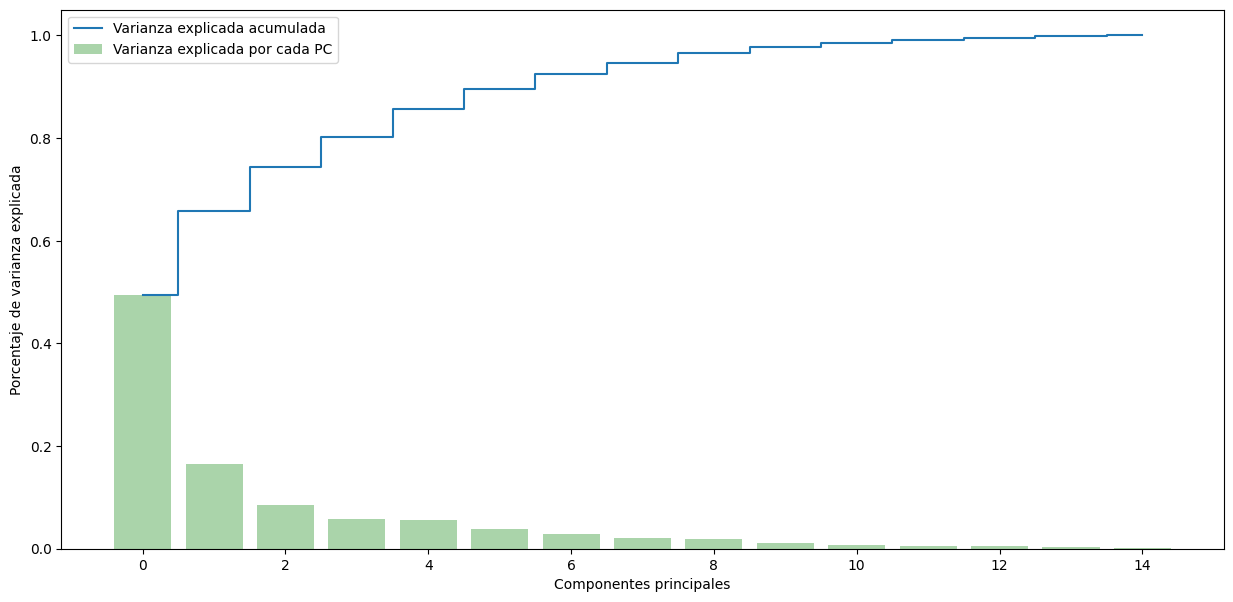

In [1360]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [1361]:
np.sum(pca.explained_variance_ratio_[0:4])

0.801619998033961

Encontramos que los primeros 4 componentes conservan el 80.16% de la información original, y los primeros 5 el 85.7%. Vamos a quedarnos solo con los 4 primeros PCs.

In [1362]:
dataPca = dataPca[:,0:4]

In [1363]:
dataPca[0:4]

array([[-0.50361898, -1.90143643,  0.76477956,  2.46945819],
       [ 0.40217036, -1.22685236, -0.94474628, -0.50986635],
       [-0.1329521 , -0.66026232, -0.57895438, -1.1011468 ],
       [ 1.29728738, -1.48691976, -0.32730436, -1.18312615]])

In [1364]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid() 

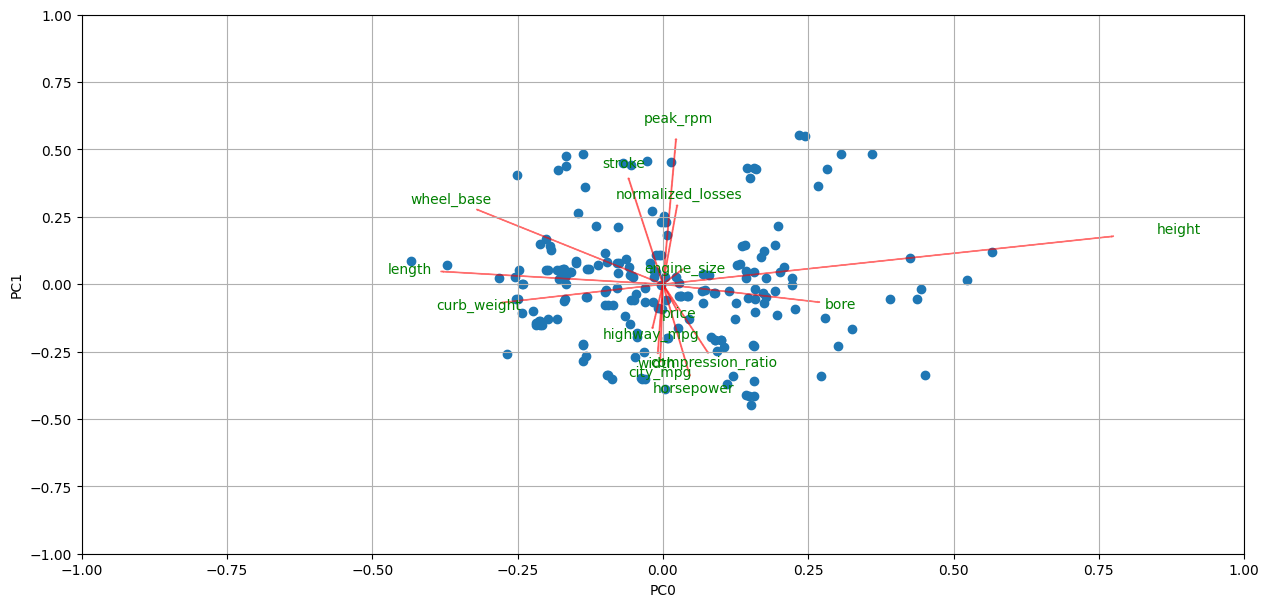

In [1365]:
biplot(dataPca, pca.components_, 0, 1, dataStd.columns)

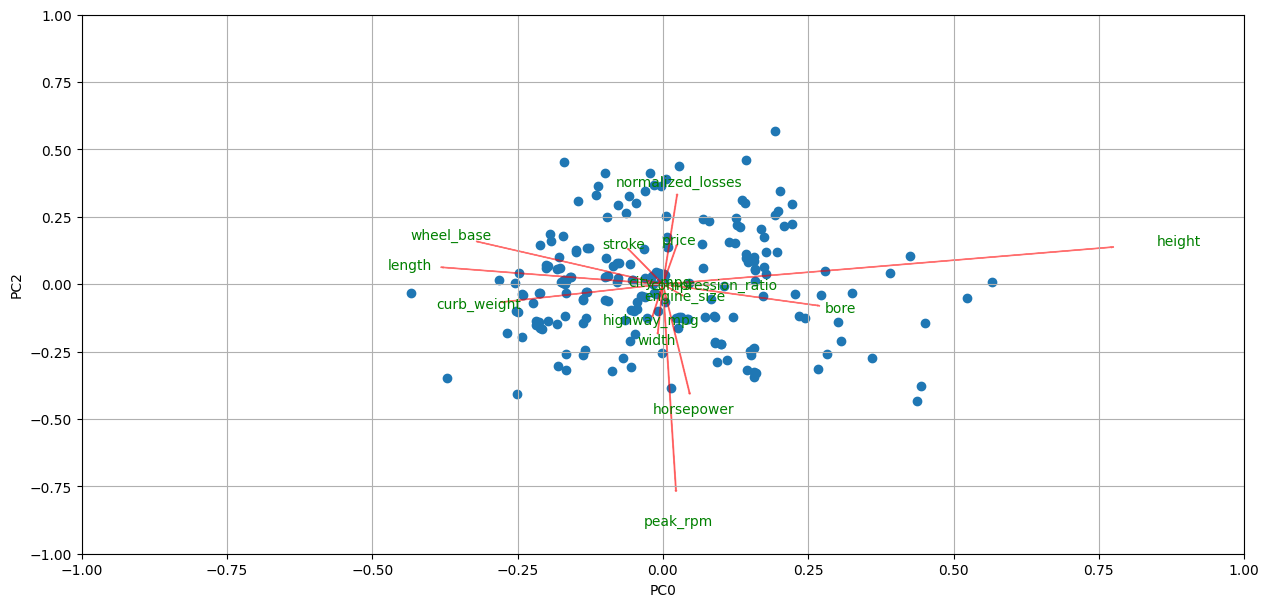

In [1366]:
biplot(dataPca, pca.components_, 0, 2, dataStd.columns)

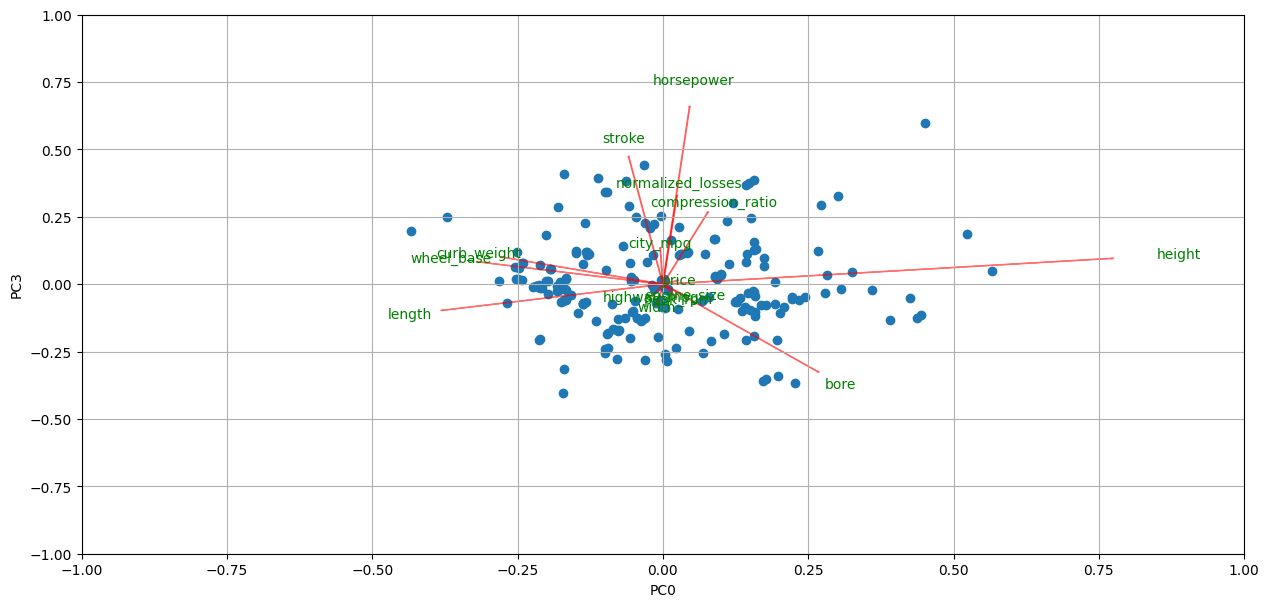

In [1367]:
#OJO se exlota aquí
biplot(dataPca, pca.components_, 0, 3, dataStd.columns)

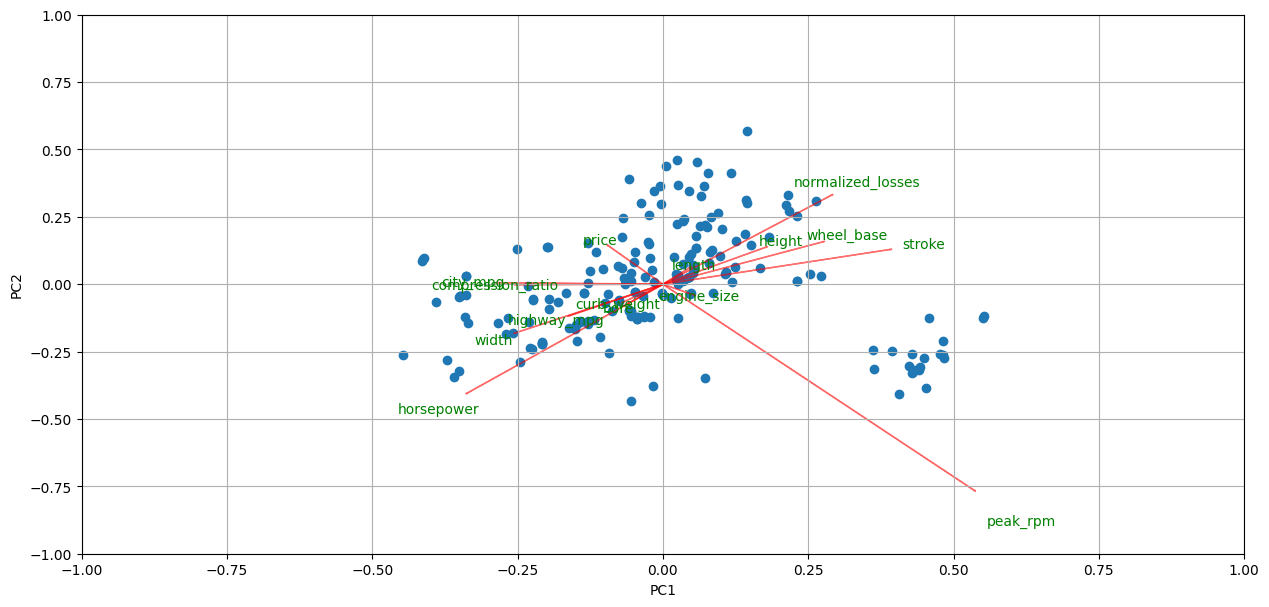

In [1368]:
biplot(dataPca, pca.components_, 1, 2, dataStd.columns)

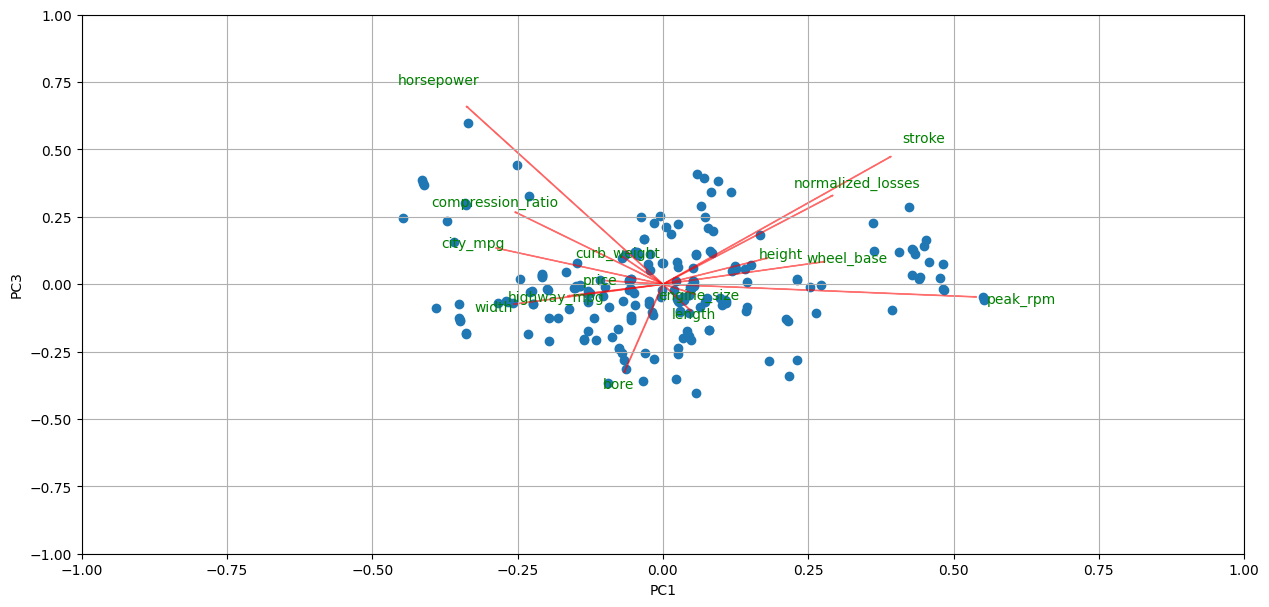

In [1369]:
biplot(dataPca, pca.components_, 1, 3, dataStd.columns)

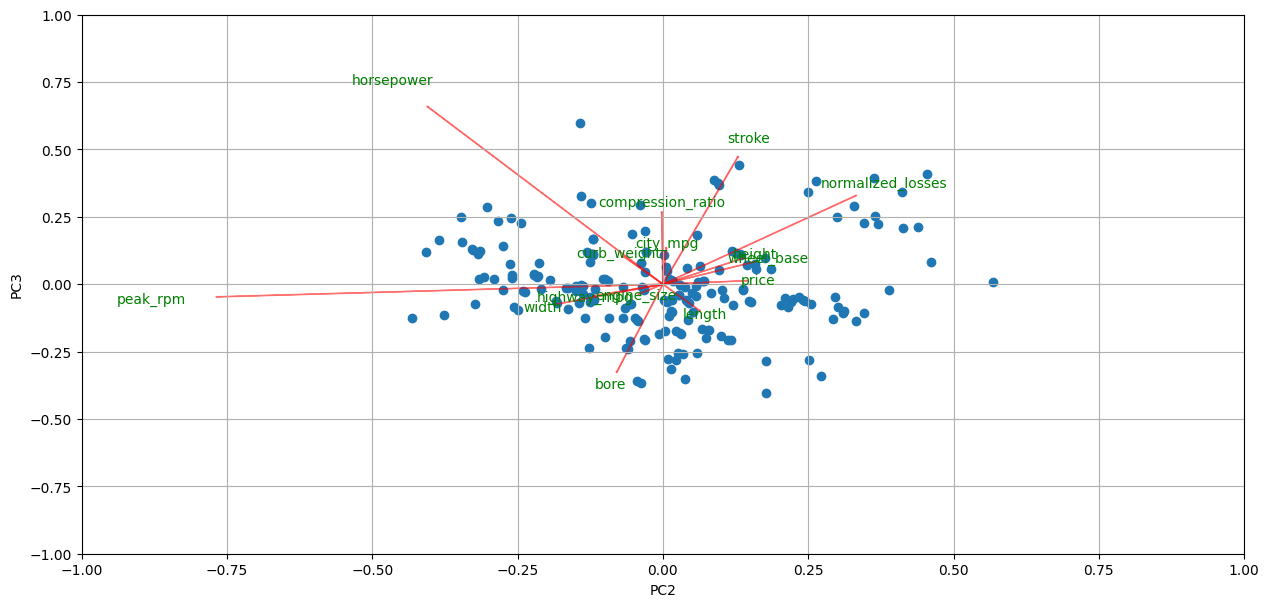

In [1370]:
biplot(dataPca, pca.components_, 2, 3, dataStd.columns)

## **4. Caracterización de los autos**

Con los datos en su nueva representación, realizar una segmentación, estableciendo el mejor número de conglomerados entre 3 y 5. Caracterizar los conglomerados con respecto a las variables originales.

Nota de la clase: Lo 1ro que debería hacer es buscar un metodo para seleccionar el K (Codo, Silueta,etc) debo graficar los metodos para poder definir euristicamente y soportar la decision y luego aplicar el K-means

### **Implemetación K-means**

In [1371]:
dataPca = pd.DataFrame(dataPca)
dataPca.columns=['PC0', 'PC1', 'PC2', 'PC3']

In [1372]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [1373]:
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({2: 81, 0: 76, 1: 47})


In [1374]:
var_num = dataStd.columns

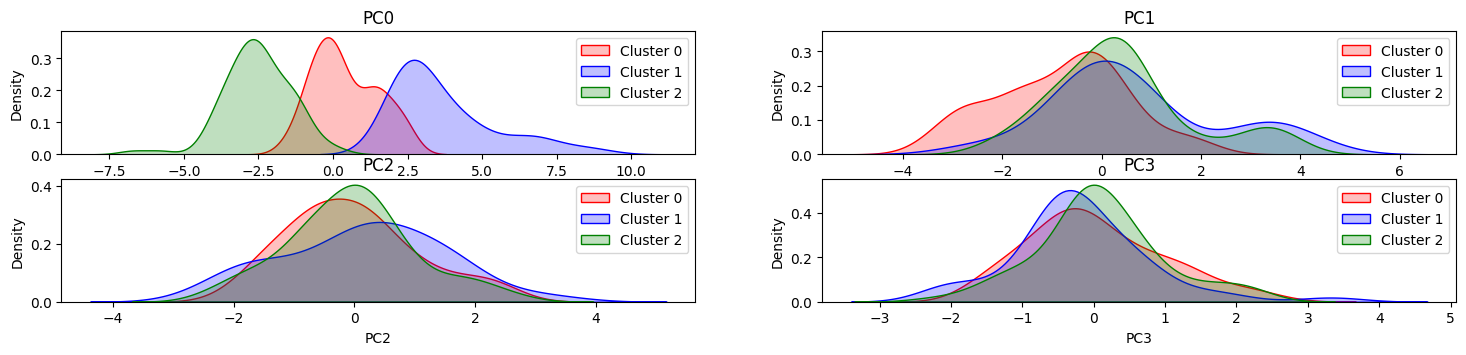

In [1375]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataPca.columns[0:4]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==2][var], shade=True, color='g', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

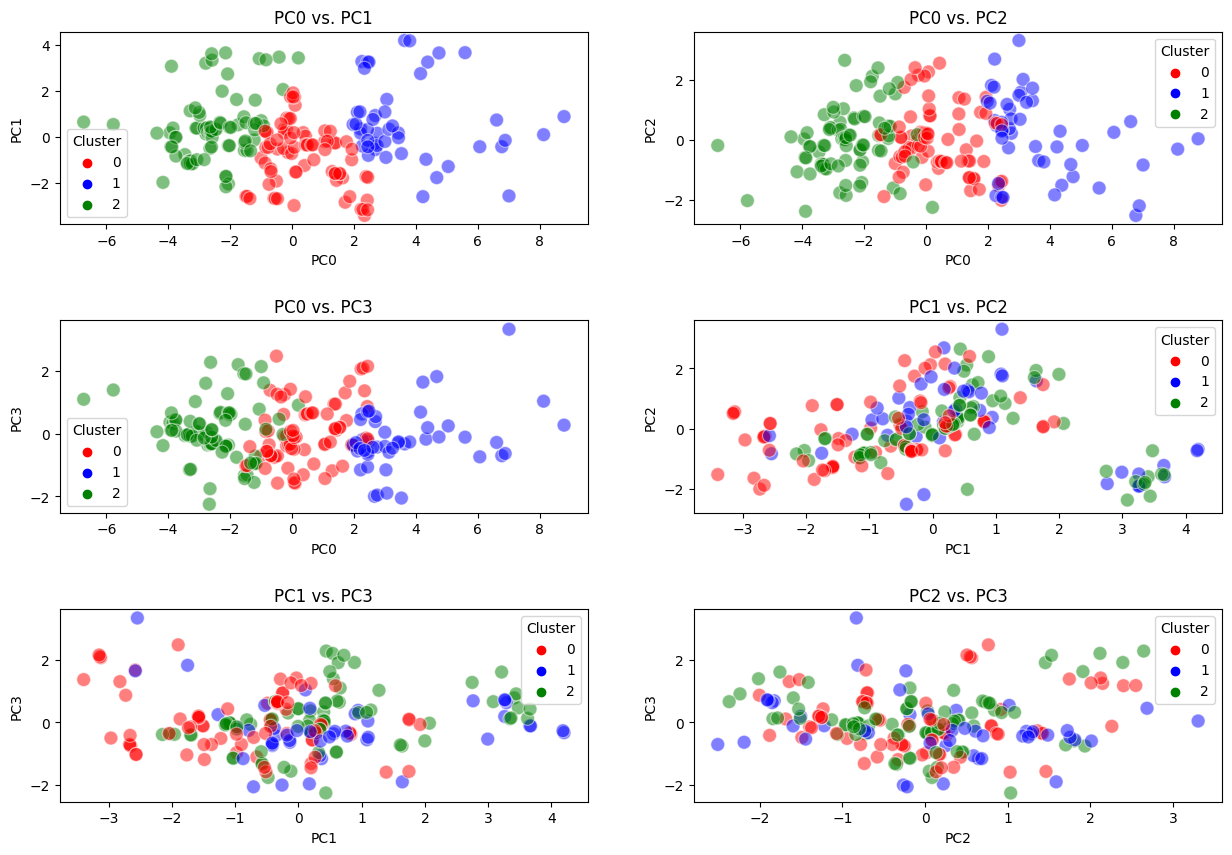

In [1376]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]

ax = fig.add_subplot(3, 2, 1)
sns.scatterplot(x="PC0", y="PC1", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC0 vs. PC1")

ax = fig.add_subplot(3, 2, 2)
sns.scatterplot(x="PC0", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC0 vs. PC2")

ax = fig.add_subplot(3, 2, 3)
sns.scatterplot(x="PC0", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC0 vs. PC3")

ax = fig.add_subplot(3, 2, 4)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")

ax = fig.add_subplot(3, 2, 5)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")

ax = fig.add_subplot(3, 2, 6)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")

plt.subplots_adjust(hspace=0.5)  # Añadí un espacio vertical entre los gráficos

plt.show()

Para este criterio, el mayor score está en K=2, al igual que con el método de silueta. Pero como ya dijimos, no nos convendría mucho un clustering con solo dos segmentos para este caso de aplicación.
Encontramos que entre mas pequeño el K mejor, pero vemos que después de K=6 encontramos una gran desmejoría.

Con el método de silueta lo más indicado podría ser solo considerar dos clusters.

### **Metodos para selección del K**

#### **Codo**

En el atributo *inertia_* queda el valor de la suma de las distancias cuadráticas entre cada punto y el centro del cluster al que pertenece (el **WSS** - Within Sum of Squares, también llamado más genéricamente **SSE** - Sum of Squared Errors)

In [1377]:
kmeans.inertia_

1180.7976340133378

In [1378]:
kmeans.init

'k-means++'

A partir de los valores de WSS se puede crear el plot a partir del cual se aplica la técnica del codo, creando un clustering para diferentes valores de K. Veamos, según el método del codo, cual sería el valor del K en este conjunto de datos:

In [1379]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    WSSs.append(km.inertia_)
WSSs

[3060.000000000001,
 2034.7574179773087,
 1763.8926522914726,
 1593.5257867929222,
 1420.2946911566034,
 1267.6881518610057,
 1120.8024264146711,
 1036.046731776899,
 960.3438275497949,
 893.3900218697597,
 840.1153508753625,
 801.7405967490508,
 775.3458201537275,
 729.9617452712162]

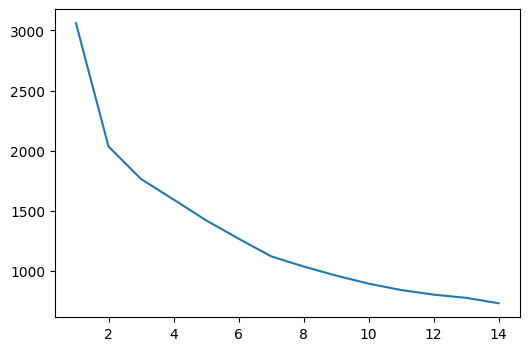

In [1380]:
plt.plot(range(1, 15), WSSs)

Con K=3 encontramos aproximadamente el codo. 

#### **Silueta**

Veamos ahora con el método de silueta cuántos clusters deberíamos tener. Obtengamos las siluetas para k = 2, 3, 4 y 5.

Veamos las siluetas de los puntos de cada cluster.
Vamos a crear un bar plot horizontal (barh) para los puntos de cada cluster.

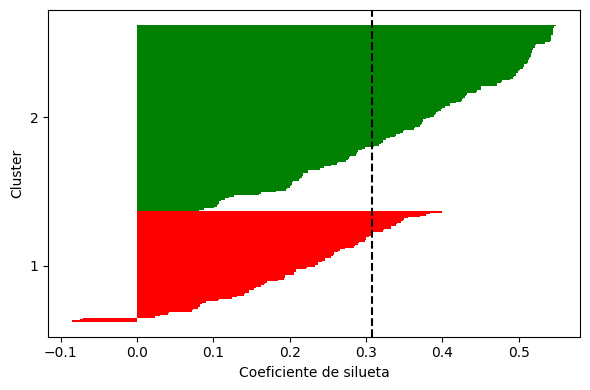

In [1381]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

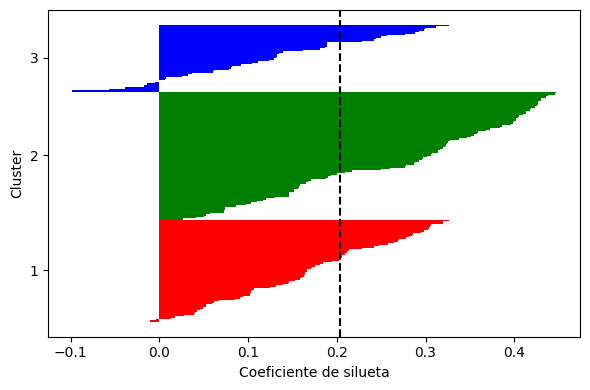

In [1382]:
k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

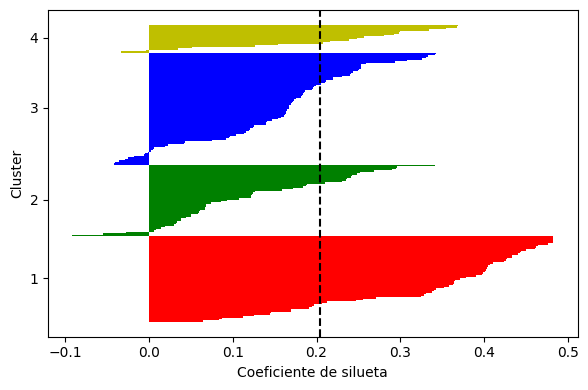

In [1383]:
k=4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

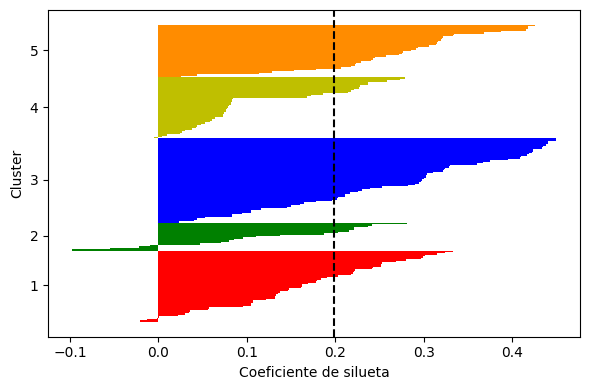

In [1384]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['red', 'g', 'b', 'y', 'darkorange']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
plt.show()

#### **Calinski-Harabaz**

Intentemos ahora con la métrica de Calinski-Harabasz

In [1385]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    CH = calinski_harabasz_score(dataStd, km.labels_) 
    CHs.append(CH)
    
CHs

[101.78068389815941,
 73.84734455097814,
 61.35134326498544,
 57.43550238051575,
 55.98817744104484,
 56.807800226122815,
 54.69897232632764,
 53.292495599259794,
 52.27558021418757,
 50.99748943221219,
 49.16414556282733,
 46.90046439150204,
 46.65231497681816]

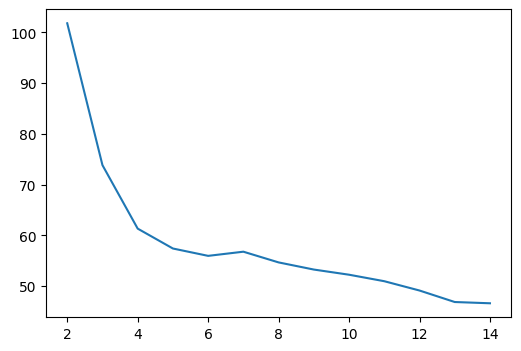

In [1386]:
plt.plot(range(2, 15), CHs)

# **Bibliografía**

file:///C:/Users/Gustavo/Downloads/Modelos/Copia%20de%2004-KNN-Protocolos-Ejemplo.html

file:///C:/Users/Gustavo/Downloads/Modelos/Copia%20de%2004-KNN-CHURN.html.

# **Rubrica**

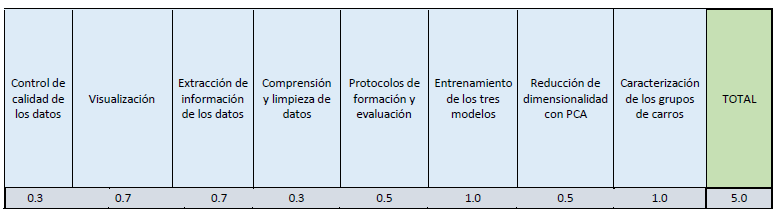